## Background

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The Airline Passenger Satisfation dataset contains survey results related to airline passenger satisfaction, where many factors were surveyed to measure overall passenger satisfaction.

A company operating in the aviation sector conducted a survey regarding passenger satisfaction. In this survey, passengers are asked about many factors to assess and later be able to measure overall passenger satisfaction.

## Problem Statement (Business Problem)

To find out the condition and improve the quality of the airline, the company wants to know the following business problems.

The company (Airline) wants to know:

1. What is the condition of customer satisfaction? To find out the condition of the distribution of customer satisfaction,    both satisfied and non-satisfied.
2. What factors have the greatest influence on overall passenger satisfaction and dissatisfaction? So that companies can      evaluate these factors so that the level of passenger satisfaction can increase.
3. What class of passengers are most dissatisfied (aside from satisfied)? This can help companies determine who the right      strategy needs to be applied to in order to increase overall passenger satisfaction.
4. How is the type of passenger related to the level of passenger satisfaction? This can help companies determine who the      right strategy needs to be applied to in order to increase passenger satisfaction.
5. How is the relationship between plane delays and passenger satisfaction levels? The company wants to know how plane        delays affect passenger satisfaction levels.

## Dataset

**AIRLINE PASSENGER SATISFACTION DATASET**

This dataset's been downloaded from Kaggle (link: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

Data consists of information about individuals who have previously travelled with an airline firm. The primary goal of this dataset is to forecast if a future customer will be satisfied with their service and which aspects of their services should be focused more in order to generate more satisfied consumers. There are a total of 129880 observations (train data:103904, test data:25976) and 25 columns in the data.

**ATTRIBUTES:**
> Id: Id number of the passengers

> Gender: Gender of the passengers (Female, Male)

> Customer Type: The customer type (Loyal customer, disloyal customer)

> Age: The actual age of the passengers

> Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

> Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

> Flight Distance: The flight distance of this journey

> Inflight wifi service: Satisfaction level of the inflight wifi service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Ease of Online booking: Satisfaction level of online booking (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Gate location: Satisfaction level of Gate location (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Food and drink: Satisfaction level of Food and drink service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Online boarding: Satisfaction level of online boarding (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Seat comfort: Satisfaction level of Seat comfort (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Inflight entertainment: Satisfaction level of inflight entertainment (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> On-board service: Satisfaction level of On-board service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Leg room service: Satisfaction level of Leg room service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Baggage handling: Satisfaction level of baggage handling (1,2,3,4,5/ 1=Least Satisfied to 5=Most Satisfied)

> Checkin service: Satisfaction level of Check-in service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Inflight service: Satisfaction level of inflight service (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Cleanliness: Satisfaction level of Cleanliness (0,1,2,3,4,5/ 0=Not Applicable; 1=Least Satisfied to 5=Most Satisfied)

> Departure Delay in Minutes: Minutes delayed when departure

> Arrival Delay in Minutes: Minutes delayed when arrival

> Satisfaction: /output column/ Airline satisfaction level ('satisfied', 'neutral or dissatisfied')

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

There are two data available, train and test. I will check the first few rows and the column names of this data. For convenience, I will combine two data and continue my operations with a single data.

In [100]:
data_train = pd.read_csv('/content/drive/MyDrive/Airline project/Dataset/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Airline project/Dataset/test.csv')
data_train.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [101]:
data_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [102]:
data_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [103]:
print(f"Train data has {data_train.shape[0]} rows and  {data_train.shape[1]} columns.\n")
print("Distribution of target value:")
print(data_train.satisfaction.value_counts())

Train data has 103904 rows and  25 columns.

Distribution of target value:
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


Combining these two dataset into one

In [104]:
data = pd.concat([data_train,data_test])
data.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [105]:
data.shape

(129880, 25)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

There are both numeric and object type features in data.

In [107]:
data.describe().T

count          mean           std   min  \
Unnamed: 0                         129880.0  44158.700000  31207.377062   0.0   
id                                 129880.0  64940.500000  37493.270818   1.0   
Age                                129880.0     39.427957     15.119360   7.0   
Flight Distance                    129880.0   1190.316392    997.452477  31.0   
Inflight wifi service              129880.0      2.728696      1.329340   0.0   
Departure/Arrival time convenient  129880.0      3.057599      1.526741   0.0   
Ease of Online booking             129880.0      2.756876      1.401740   0.0   
Gate location                      129880.0      2.976925      1.278520   0.0   
Food and drink                     129880.0      3.204774      1.329933   0.0   
Online boarding                    129880.0      3.252633      1.350719   0.0   
Seat comfort                       129880.0      3.441361      1.319289   0.0   
Inflight entertainment             129880.0      3.358077      1.334049   0.0   
On-board service                   129880.0      3.383023      1.287099   0.0   
Leg room service                   129880.0      3.350878      1.316252   0.0   
Baggage handling                   129880.0      3.632114      1.180025   1.0   
Checkin service                    129880.0      3.306267      1.266185   0.0   
Inflight service                   129880.0      3.642193      1.176669   0.0   
Cleanliness                        129880.0      3.286326      1.313682   0.0   
Departure Delay in Minutes         129880.0     14.713713     38.071126   0.0   
Arrival Delay in Minutes           129487.0     15.091129     38.465650   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         16234.75  38963.5  71433.25  103903.0  
id                                 32470.75  64940.5  97410.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    844.0   1744.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

- For the Age column, we can see that the youngest passenger is 7 years old and the oldest passenger is 85 years old. Average age is 39. When we evaluate the quarters, we can observe that the age is evenly distributed.

- For the Flight Distance column, we see that the minimum value is 414 and the maximum value is 4983. The average distance of flight is 1190. When we look at the quarters, we can say that there are outliers because there is too much difference between the 3rd quarter and the maximum value.

- For the Departure Delay in Minutes and Arrival Delay in Minutes columns, the minimum value is 0 (which corresponds to no delay in that flights) and the maximum value is around 1500. When we examine the 3rd quarter and maximum values, we can see that there are too many outlier values.

- There are many categorical features evaluated in 0-1-2-3-4-5 degrees. If we look at the averages of these ratings, the highest level of satisfaction is the Inflight service category with an average of 3.64, while the lowest is the Inflight wifi service category with an average of 2.72 points.

Checking unique values of target column

In [108]:
data.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

Checking null values

data.isna().sum()

'Arrival Delay in Minutes' column has 393 null values. I will deal with them later.

Checking whether data has duplicate values

In [109]:
data.duplicated().sum()

0

Checking number of unique elements in features

In [110]:
data.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [111]:
data.loc[data["Customer Type"]=="disloyal Customer","Customer Type"]="Disloyal Customer"
data.loc[data["Type of Travel"]=="Business travel","Type of Travel"]="Business Travel"

## DATA VISUALIZATION

### Visualizing target column

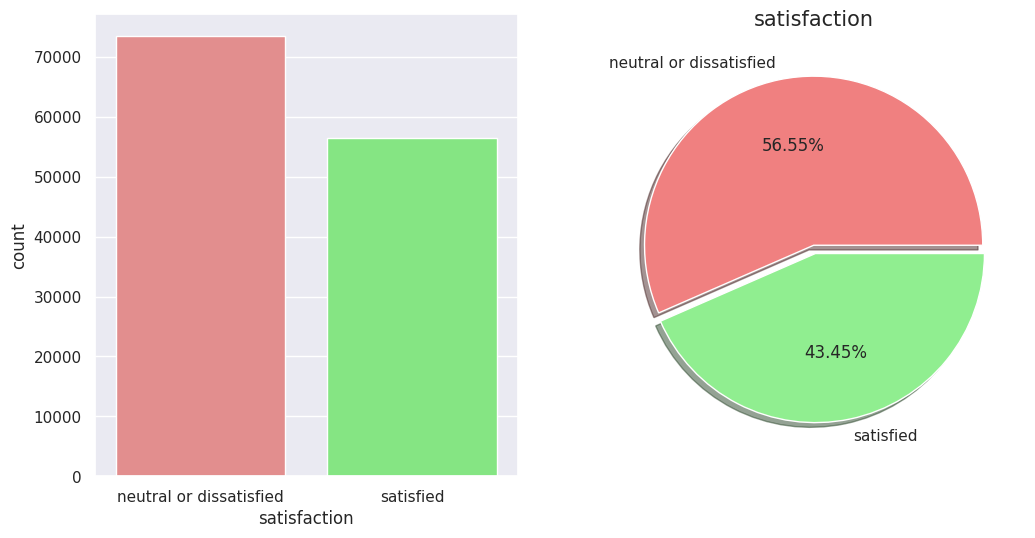

In [112]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=data, palette=["#f08080","#75f573"])

plt.subplot(1, 2, 2)
plt.pie(data['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightgreen"])
plt.title('satisfaction', fontsize=15)

plt.show()

Our target column consists of two categories which are "neutral or dissatisfied" and "satisfied". Neutral or dissatisfied passenger amount is higher in data. As shown in graph, we can say that we do not have any imbalance problem.








- 56.55% passengers felt neutral or dissatisfied and only 43.45% passengers felt satisfied with the services provided by airlines.
- so airlines need to improve the quality of service provided so that the level of passenger satisfaction increases. To do this, airlines need to know what factors influence passenger satisfaction so they can be effective and efficient in improving quality.

### Visualizing categorical features

Let's visualize categorical features by count plot. First comparing their numbers, then comparing their amount with respect to the target column (satisfaction).

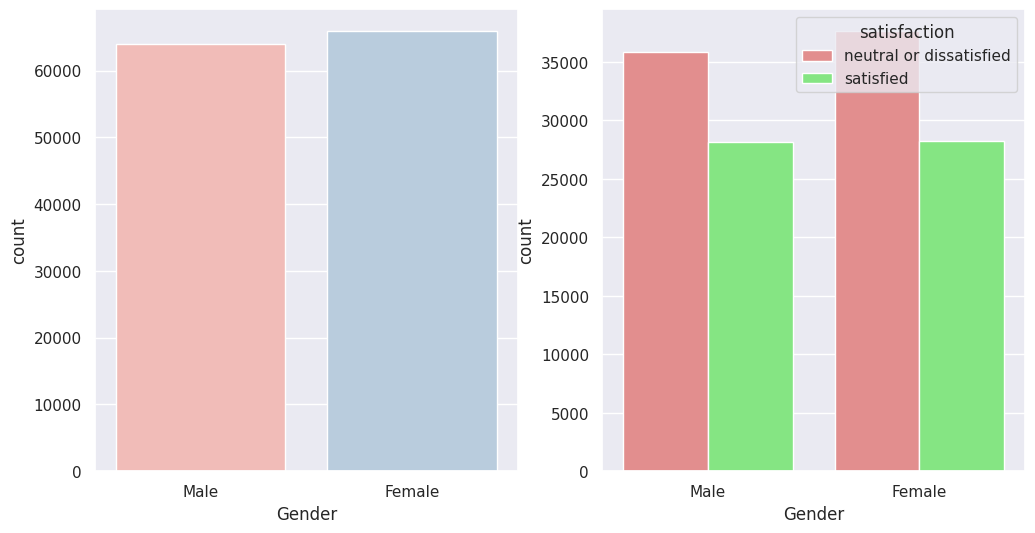

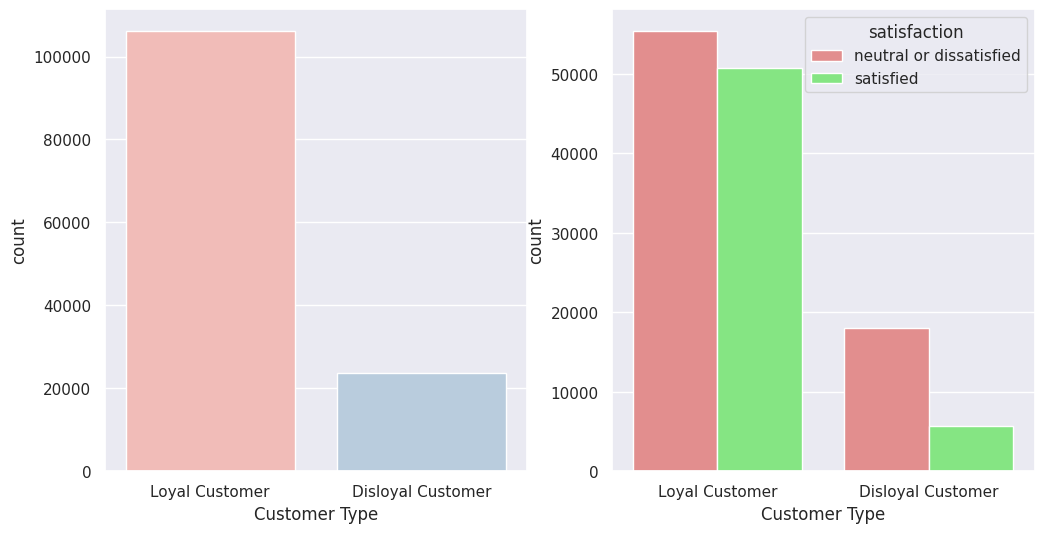

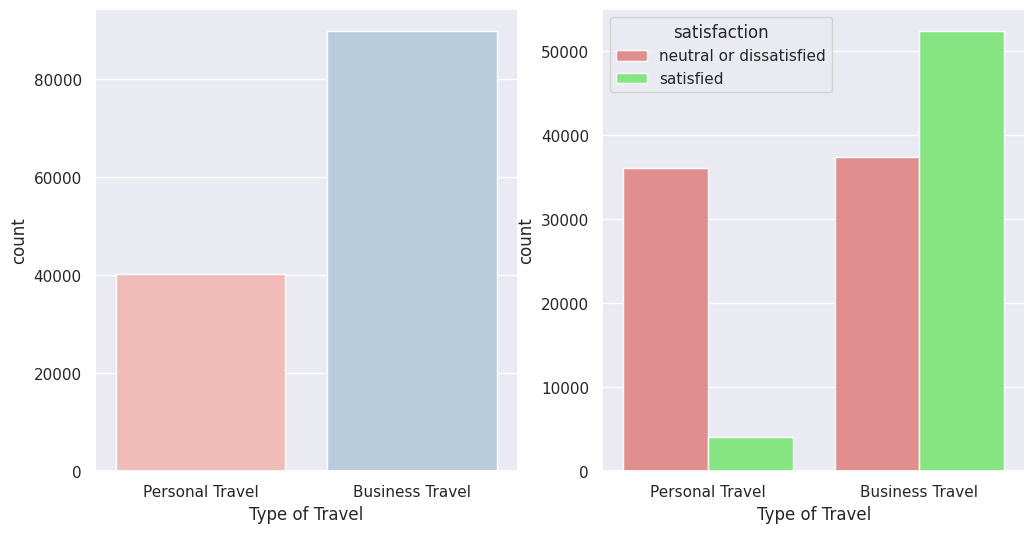

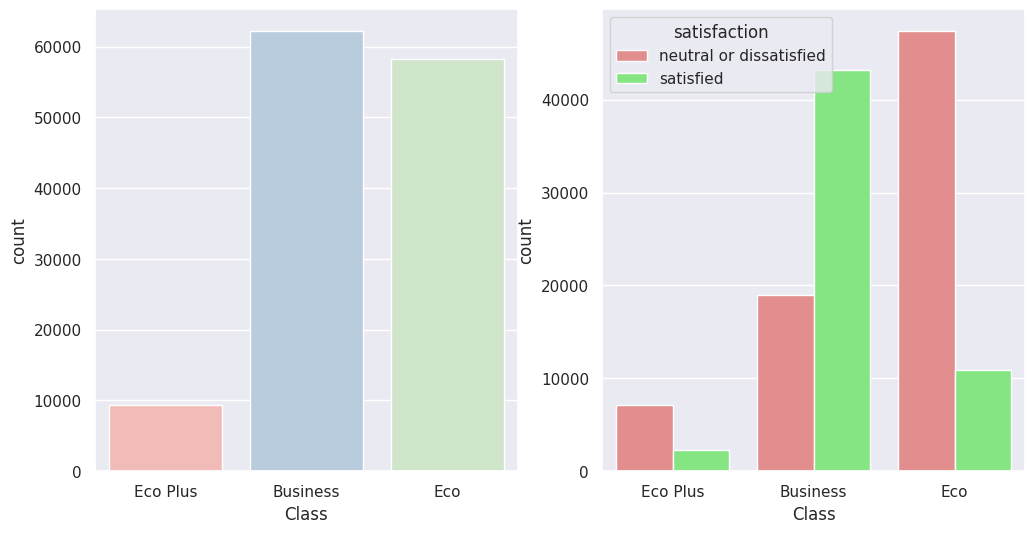

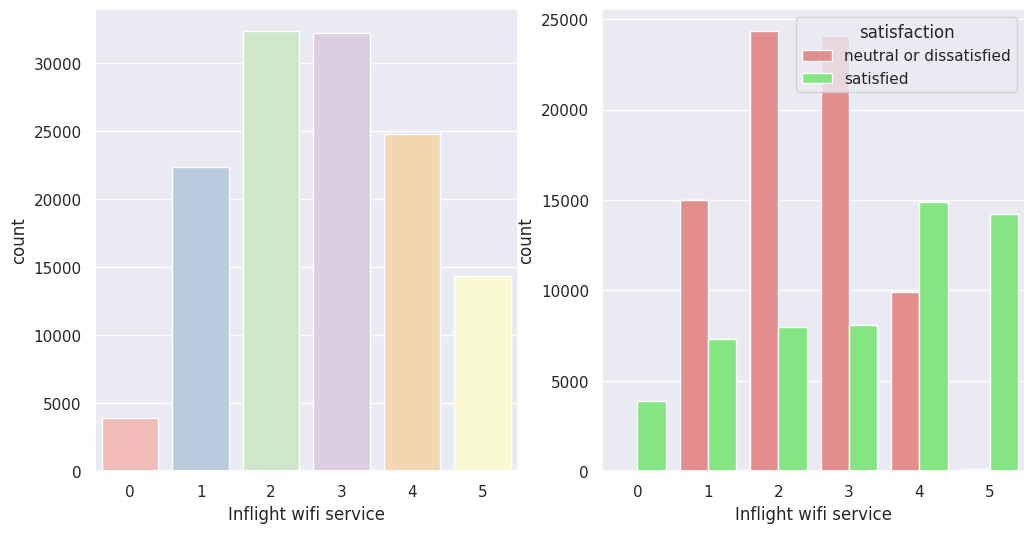

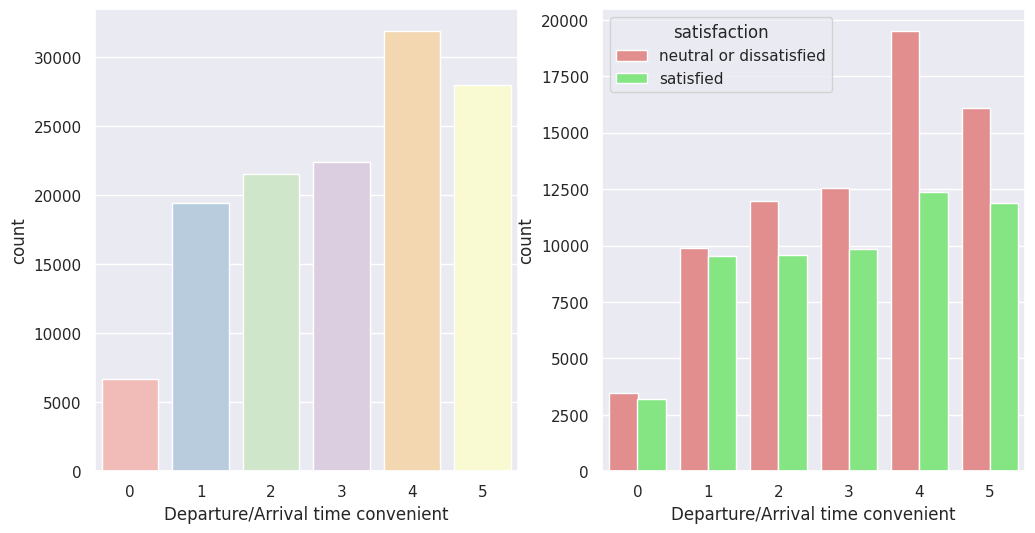

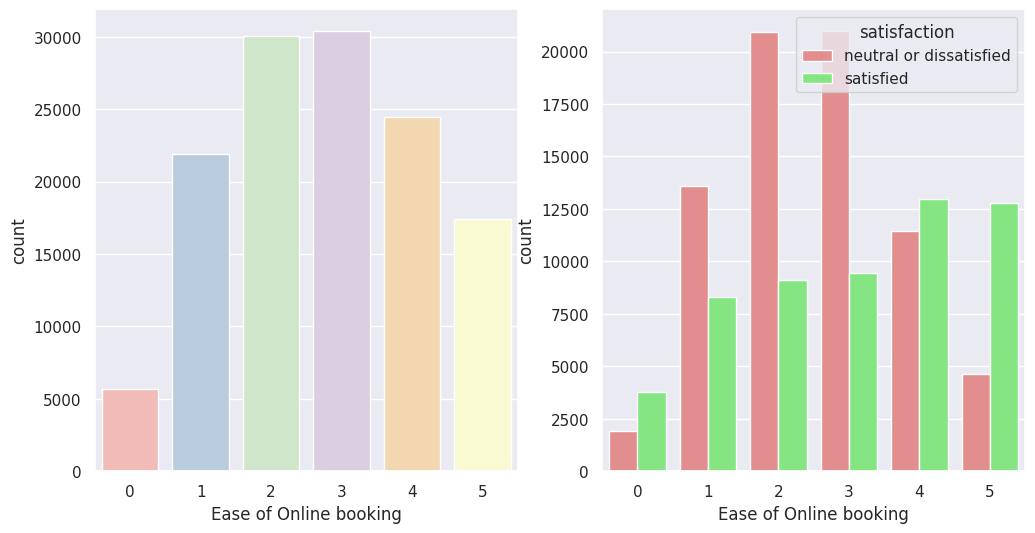

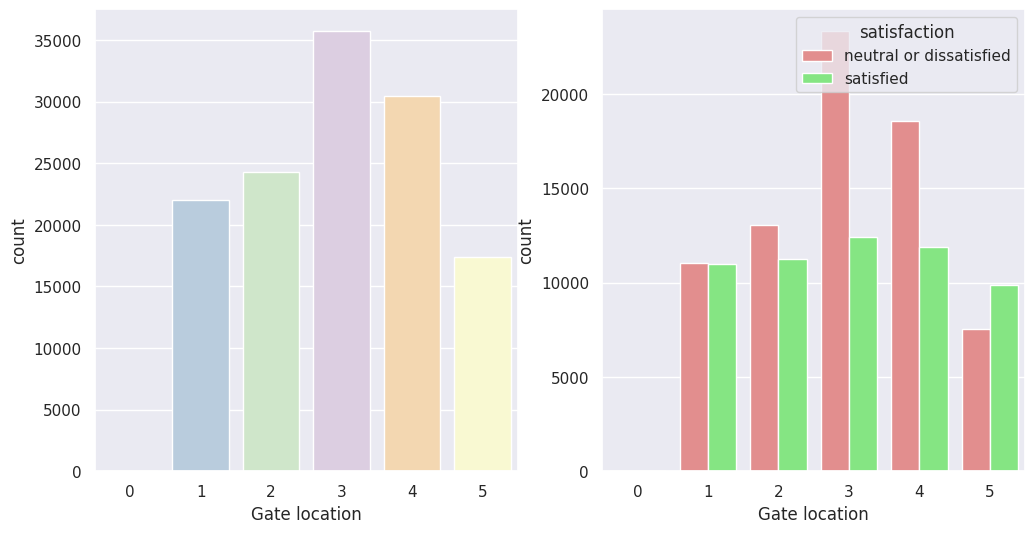

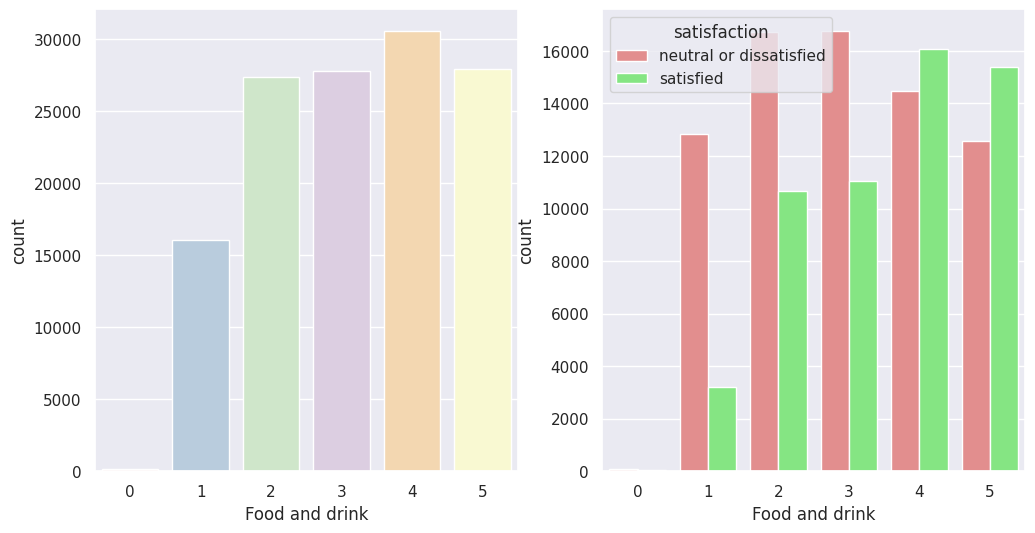

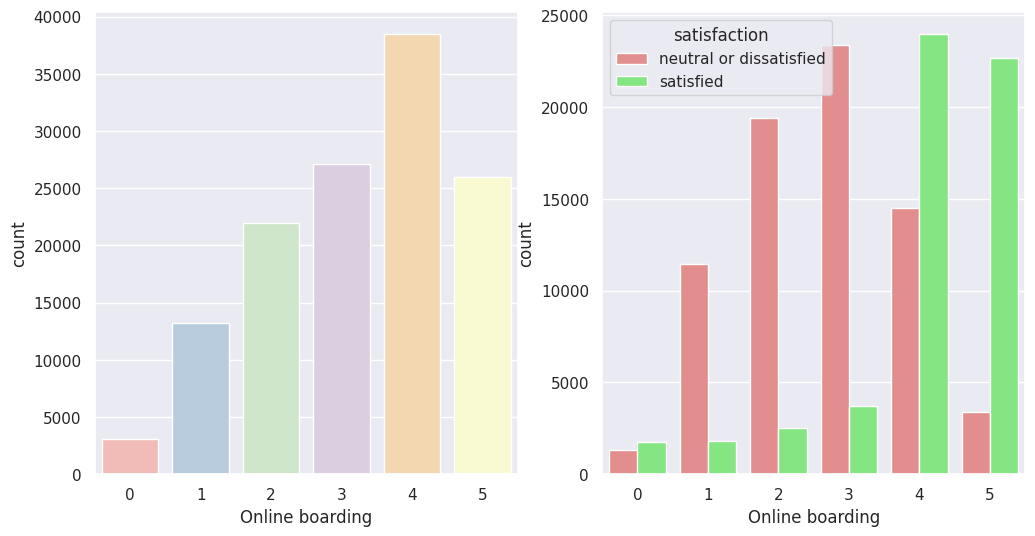

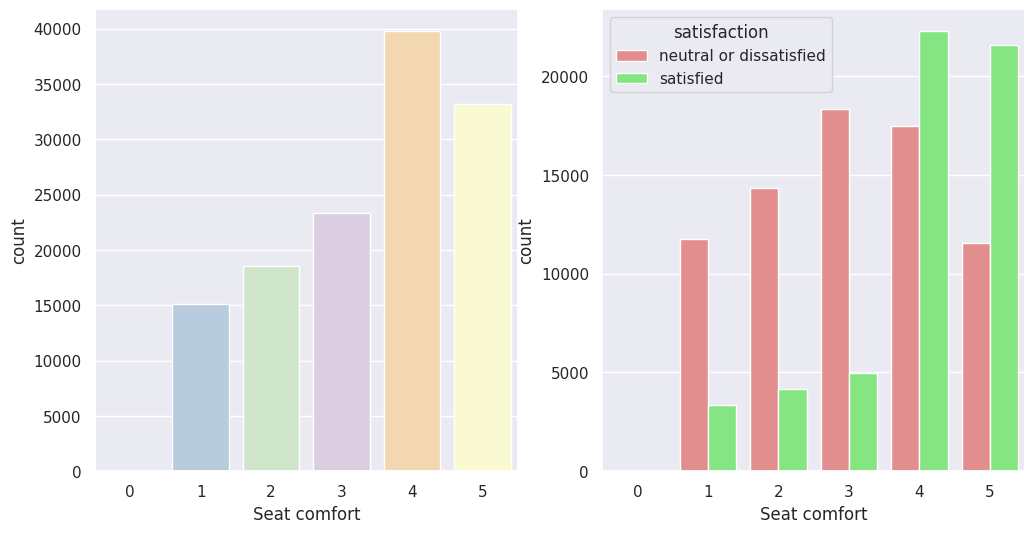

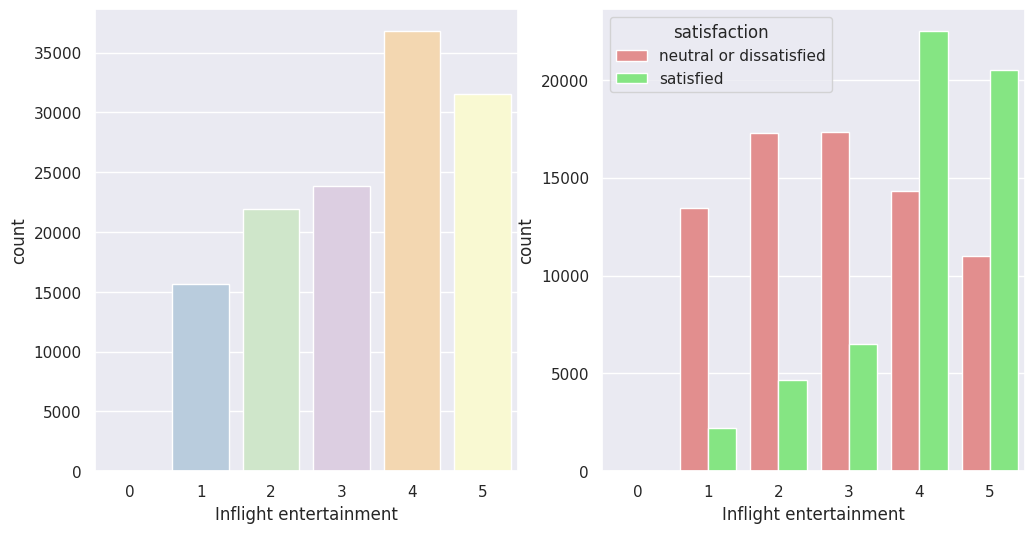

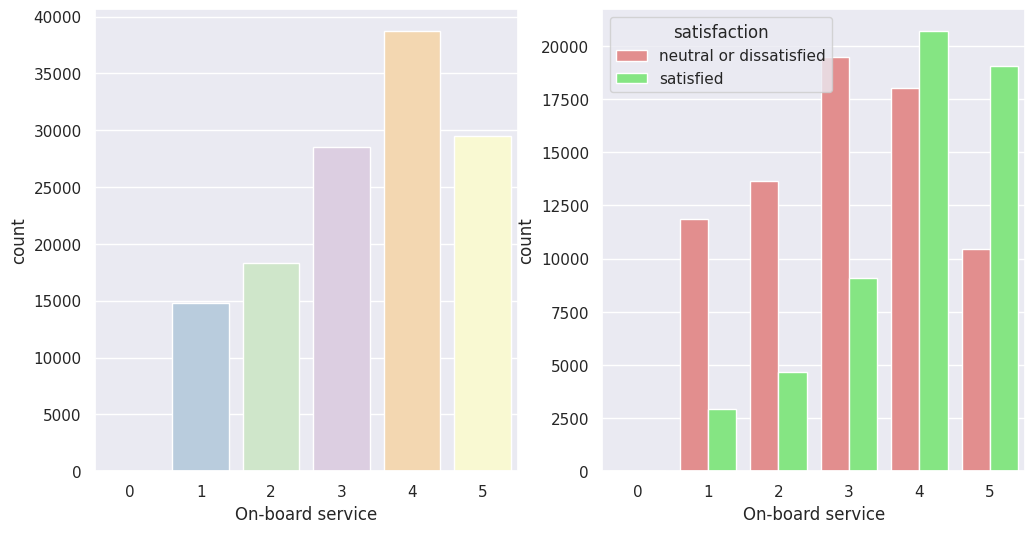

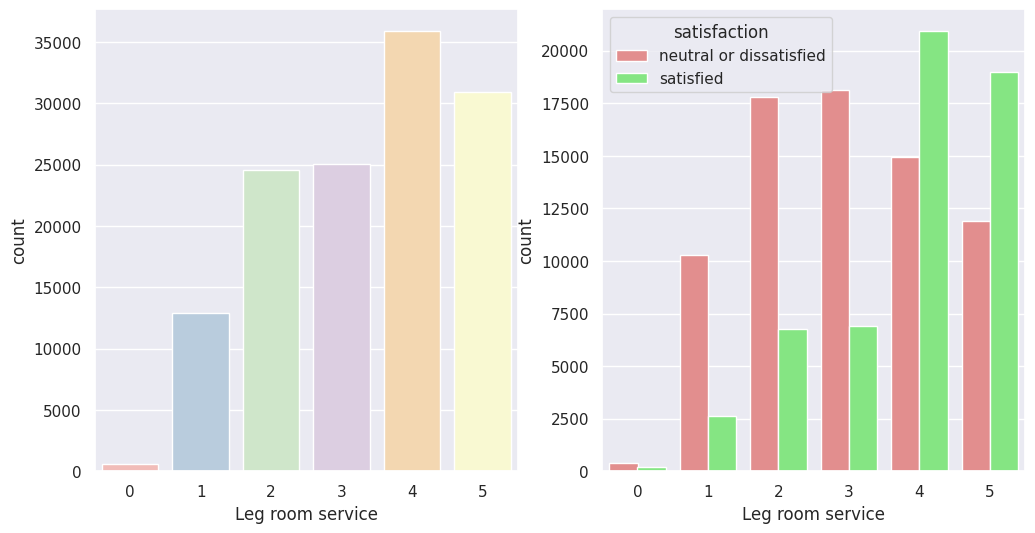

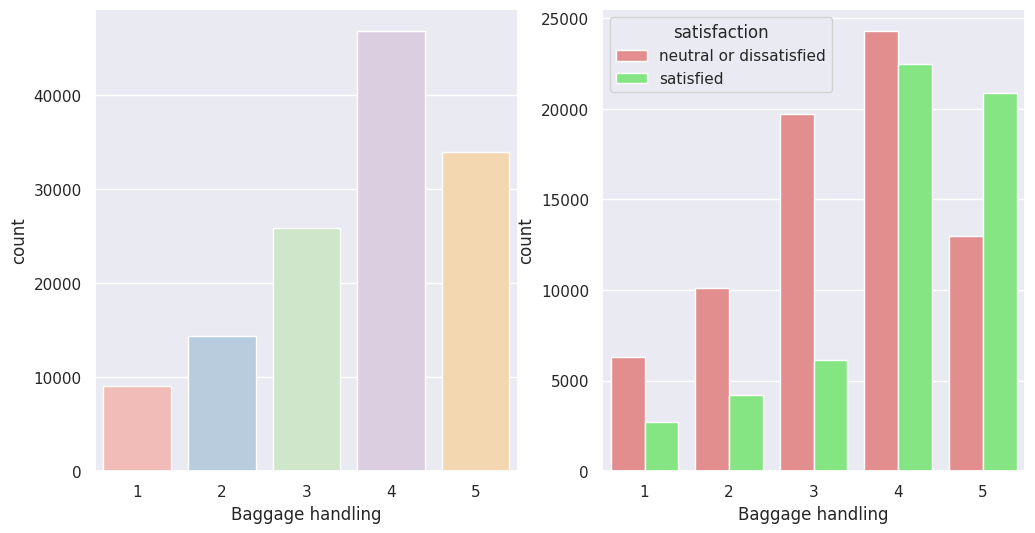

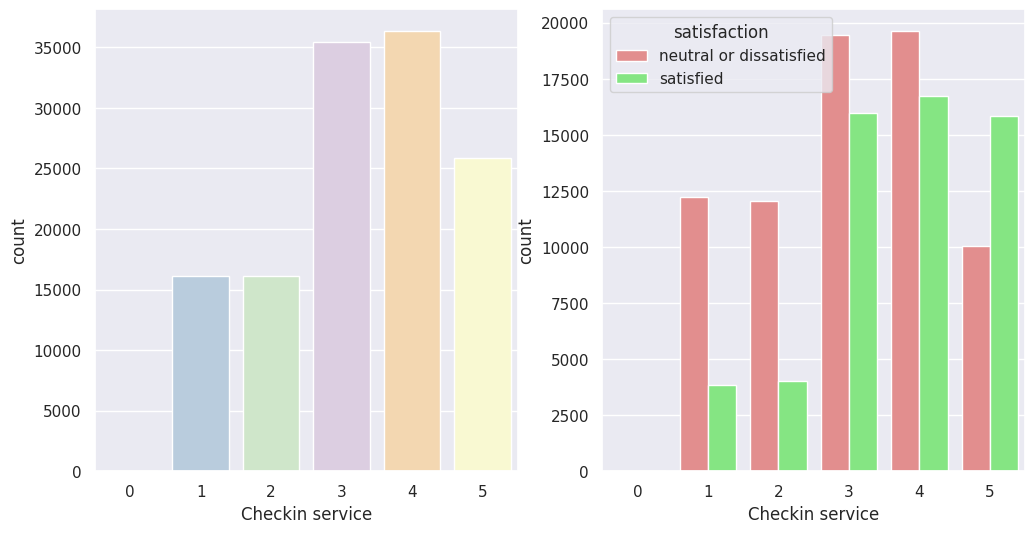

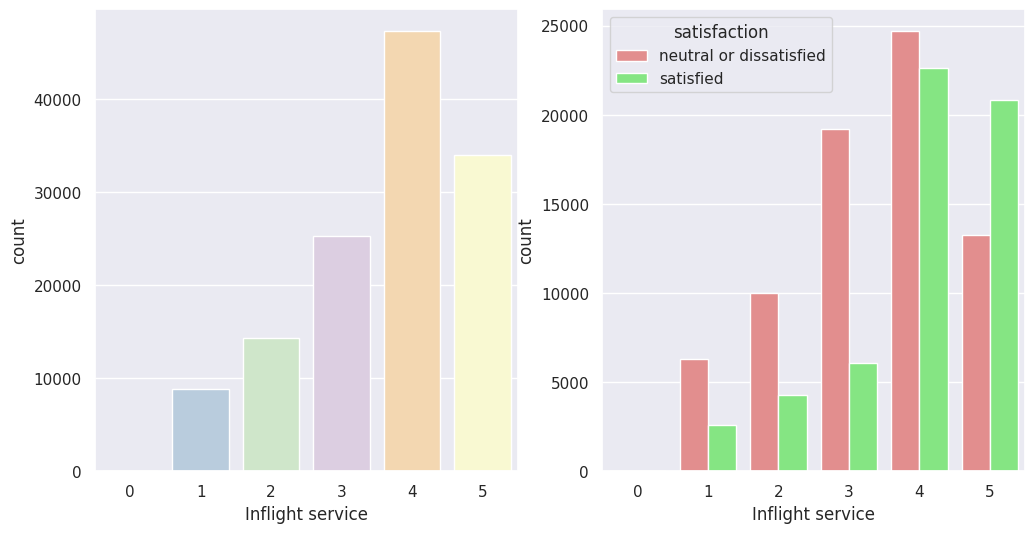

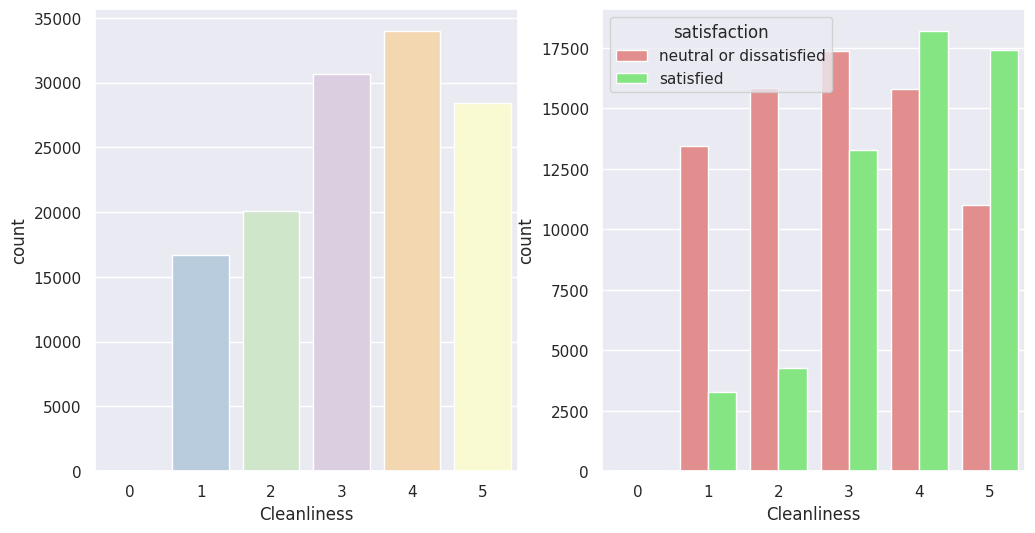

In [113]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categorics:
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  sns.countplot(x=data[i],palette="Pastel1")

  plt.subplot(1,2,2)
  sns.countplot(x=data[i],hue=data.satisfaction, palette=["#f08080","#75f573"])
  plt.show()

- Female and male data amounts are close to each other.
- In the Customer Type feature, which is divided into two groups as Loyal customer and disloyal customer, the number of Loyal customers is more than the number of Disloyal customers. We can say that half of the Loyal customers are satisfied and half are neutral or dissatisfied. But in Disloyal customers, the number of satisfied passengers is less than the number of neutral or dissatisfied.
- Type of Travel feature consists of two categories as Personal and Business travel. It seems that the number of passengers making Business travel is higher than those making Personnel travel. While the number of satisfied passengers is higher in Business travel, the number of satisfied passengers is very low in Personal travel.
- Class features are divided into three categories: Eco, Business, and Eco Plus. While the number of passengers in the Business and Eco classes is close to each other, the number of passengers in the Eco Plus class is much less. While the majority of passengers in Business class are satisfied, the majority of passengers in Eco class are neutral or dissatisfied.
- In the other features, there are 6 categories from 1 to 5 (increasing satisfaction rates), while 0 represents unimplemented features.
- Neutral or dissatisfied passengers appear more in all categories of the Departure/Arrival time convenient feature. As we can predict for other features, neutral or dissatisfied passengers are more at low satisfaction levels like 0-1-2 at the beginning, while satisfied passengers are more at high satisfaction levels like 4-5.

Removing [ 'Gender' , 'Customer_Type' , 'Type_of_Travel' , 'Class' ] features from categorics list, so that i only have categorical features having 0-1-2-3-4-5 scores can stay in list.

In [114]:
for i in ['Gender','Customer Type','Type of Travel','Class']:
  categorics.remove(i)

In [115]:
data[categorics].mean().sort_values(ascending=False)

Inflight service                     3.642193
Baggage handling                     3.632114
Seat comfort                         3.441361
On-board service                     3.383023
Inflight entertainment               3.358077
Leg room service                     3.350878
Checkin service                      3.306267
Cleanliness                          3.286326
Online boarding                      3.252633
Food and drink                       3.204774
Departure/Arrival time convenient    3.057599
Gate location                        2.976925
Ease of Online booking               2.756876
Inflight wifi service                2.728696
dtype: float64

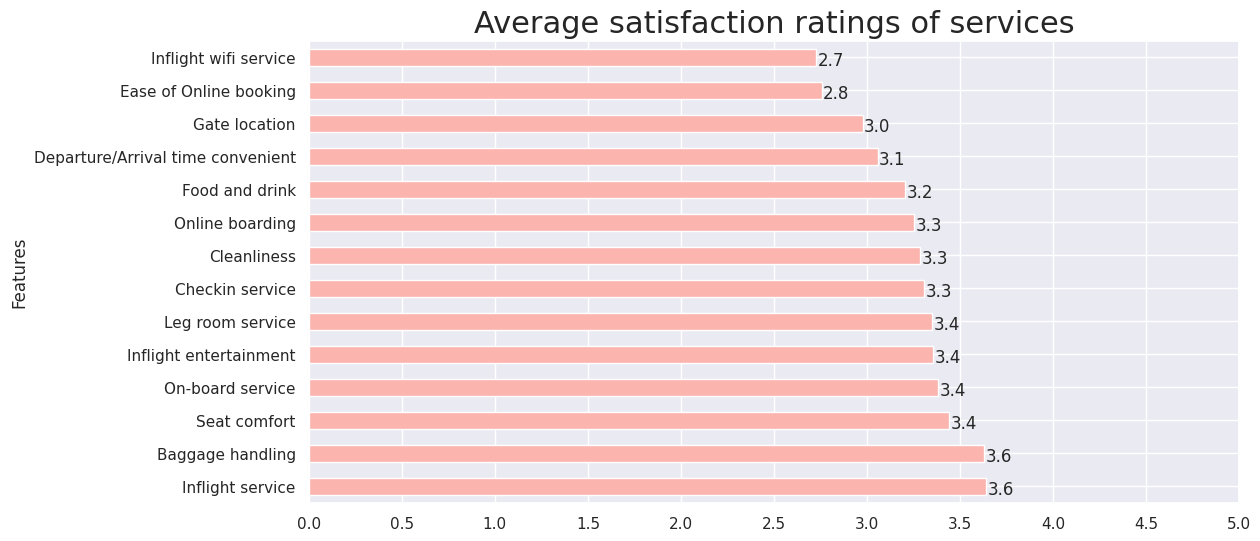

In [116]:
total = float(len(data))
ax = data[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",colormap="Pastel1",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(12,6))
plt.title('Average satisfaction ratings of services', fontsize=22)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

- The features with the highest average satisfaction rate are "Inflight service" and "Baggage handling" with average 3.6.

- The feature with the lowest satisfaction rate is "Inflight wifi service" with average 2.7.

- Namely, the Top 3 lowest factors are Inflight wifi service, Ease of Online booking, Gate location. The Top 3 best factors are Inflight service, Baggage handling, Seat comfort.

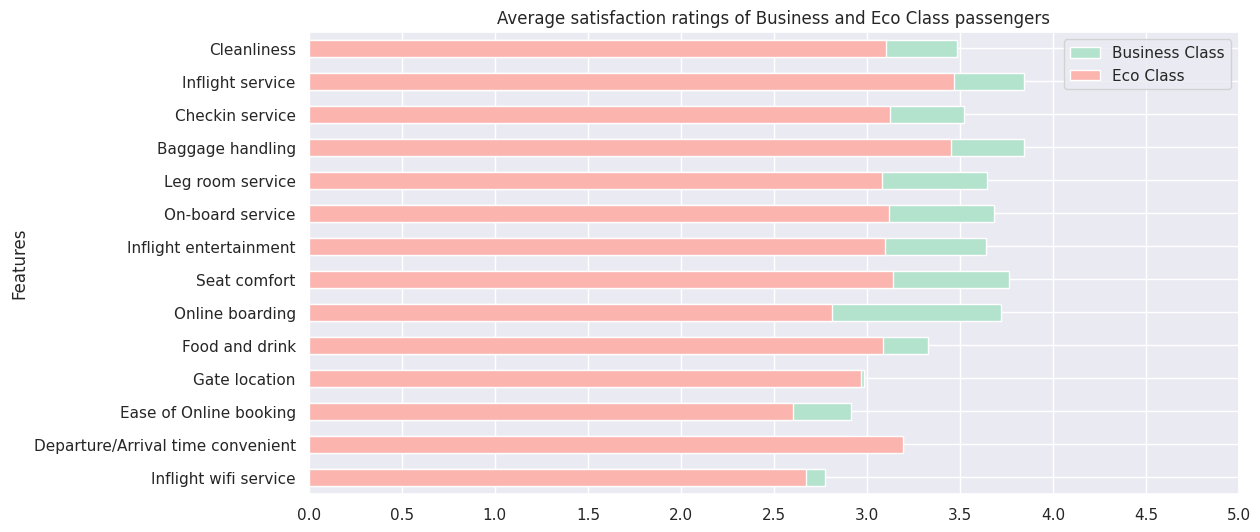

In [117]:
data[data["Class"]=="Business"].mean()[4:18].plot(kind="barh",legend=True,ylabel="Features",colormap="Pastel2",figsize=(12,6),label="Business Class",title="Average satisfaction ratings of Business and Eco Class passengers")
data[data["Class"]=="Eco"].mean()[4:18].plot(kind="barh",legend=True,colormap="Pastel1",label="Eco Class",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.show()

 checked the standard deviation to account for any deviations between ratings. They are close to each other

<Figure size 700x700 with 0 Axes>

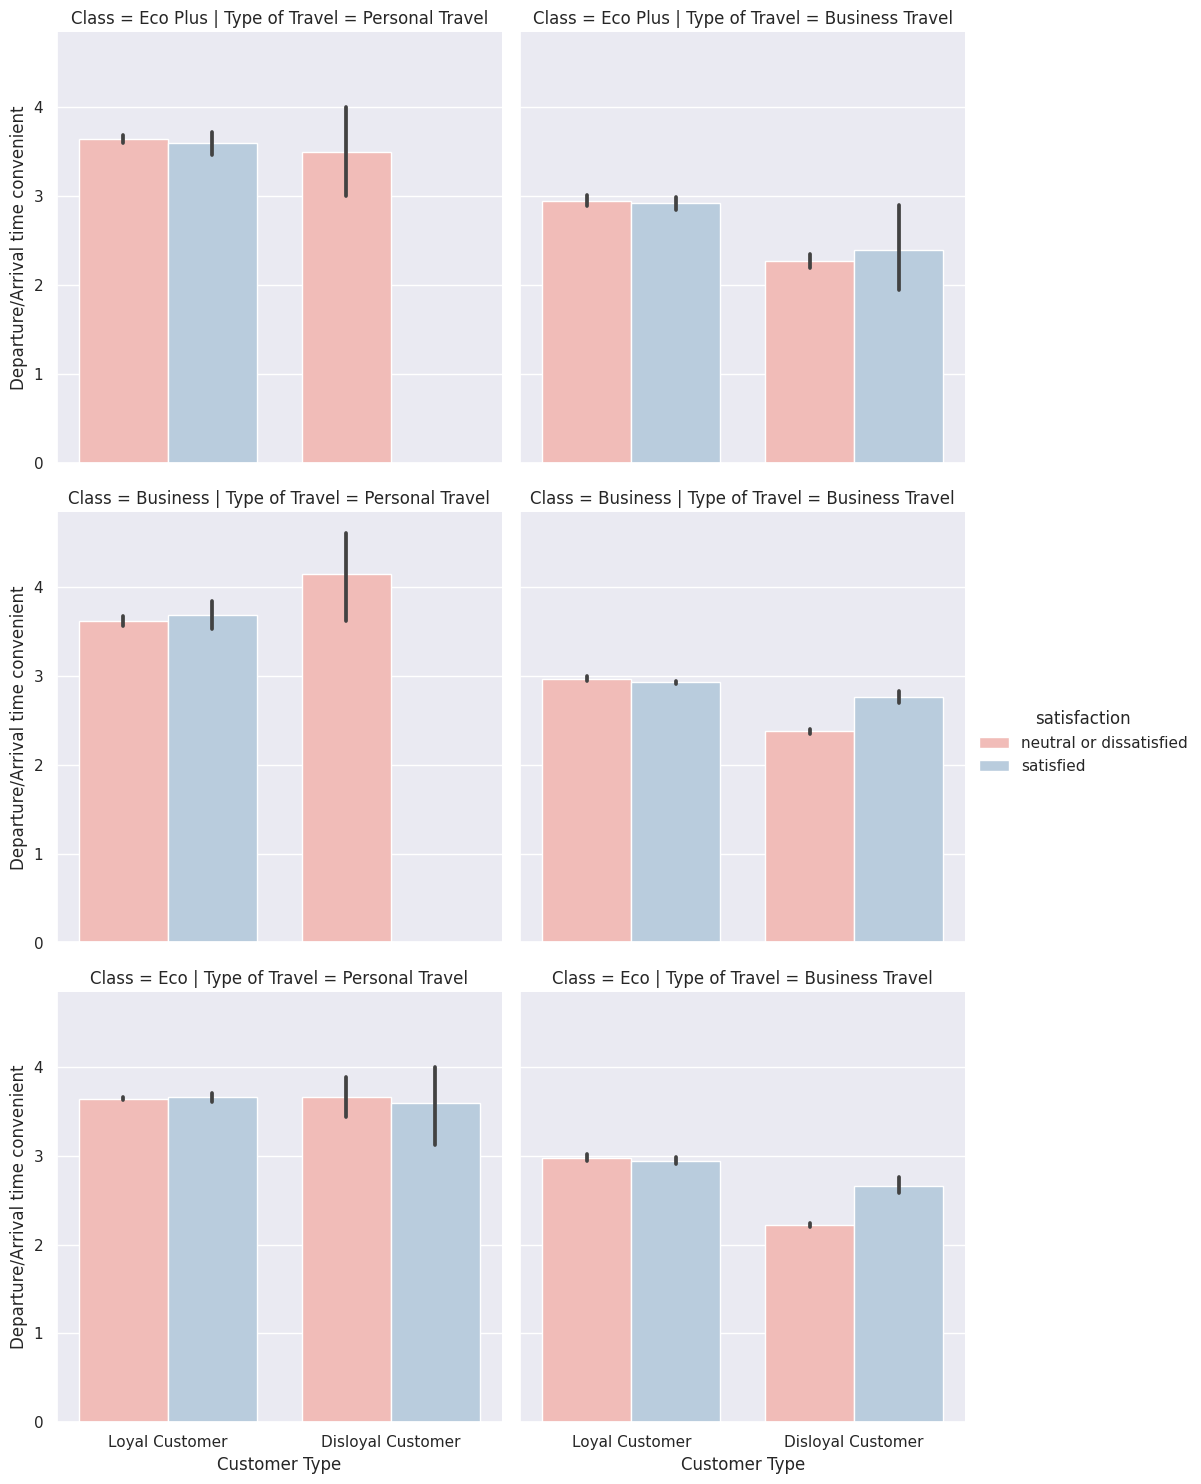

In [118]:
plt.figure(figsize=(7,7))
sns.catplot(y='Departure/Arrival time convenient',col='Type of Travel',x ='Customer Type',
            hue='satisfaction',row='Class', data=data, kind= 'bar',palette='Pastel1')
plt.show()

In [119]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)

table1=data.pivot_table(index=["Gender"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]},fill_value=0)
table1


satisfaction                                    \
                               count                        percentage   
satisfaction neutral or dissatisfied satisfied neutral or dissatisfied   
Gender                                                                   
Female                         37630     28269                   28.97   
Male                           35822     28159                   27.58   

                        
                        
satisfaction satisfied  
Gender                  
Female           21.77  
Male             21.68

In [120]:
gender="female"
for i,j,k,l in table1.values:
  print("Satisfaction rate for {} is: {:.3f}".format(gender,j/(i+j)))
  gender="male"

Satisfaction rate for female is: 0.429
Satisfaction rate for male is: 0.440


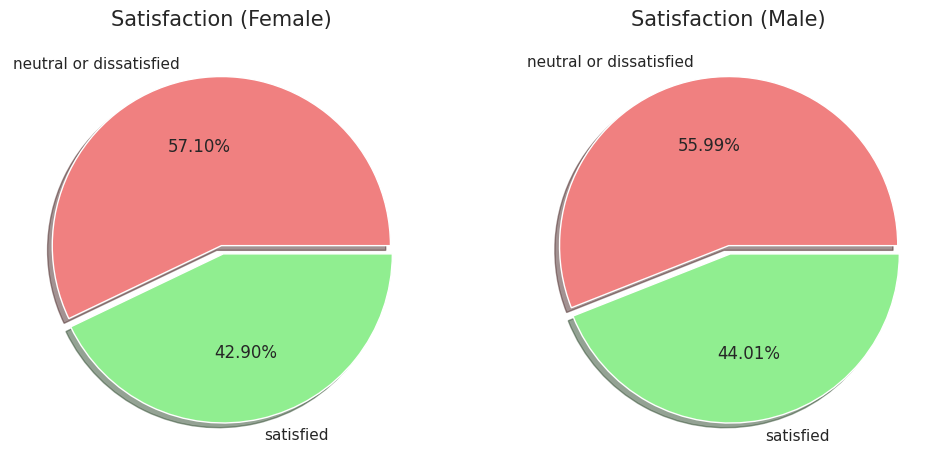

In [121]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(data.loc[data.Gender=="Female",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightgreen"])
plt.title('Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(data.loc[data.Gender=="Male",'satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["lightcoral","lightgreen"])
plt.title('Satisfaction (Male)', fontsize=15)

plt.show()

- When we look at the satisfaction rates of women and men, we see that both are around 43-44%. There is no dominance in satisfaction by gender. The dissatisfaction rate is higher in both gender.

In [122]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)

data.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]})

satisfaction            \
                                             count             
satisfaction               neutral or dissatisfied satisfied   
Customer Type     Class                                        
Disloyal Customer Business                    5569      3662   
                  Eco                        11669      1965   
                  Eco Plus                     842        73   
Loyal Customer    Business                   13425     39504   
                  Eco                        35697      8978   
                  Eco Plus                    6250      2246   

                                                              
                                        percentage            
satisfaction               neutral or dissatisfied satisfied  
Customer Type     Class                                       
Disloyal Customer Business                    4.29      2.82  
                  Eco                         8.98      1.51  
                  Eco Plus                    0.65      0.06  
Loyal Customer    Business                   10.34     30.42  
                  Eco                        27.48      6.91  
                  Eco Plus                    4.81      1.73

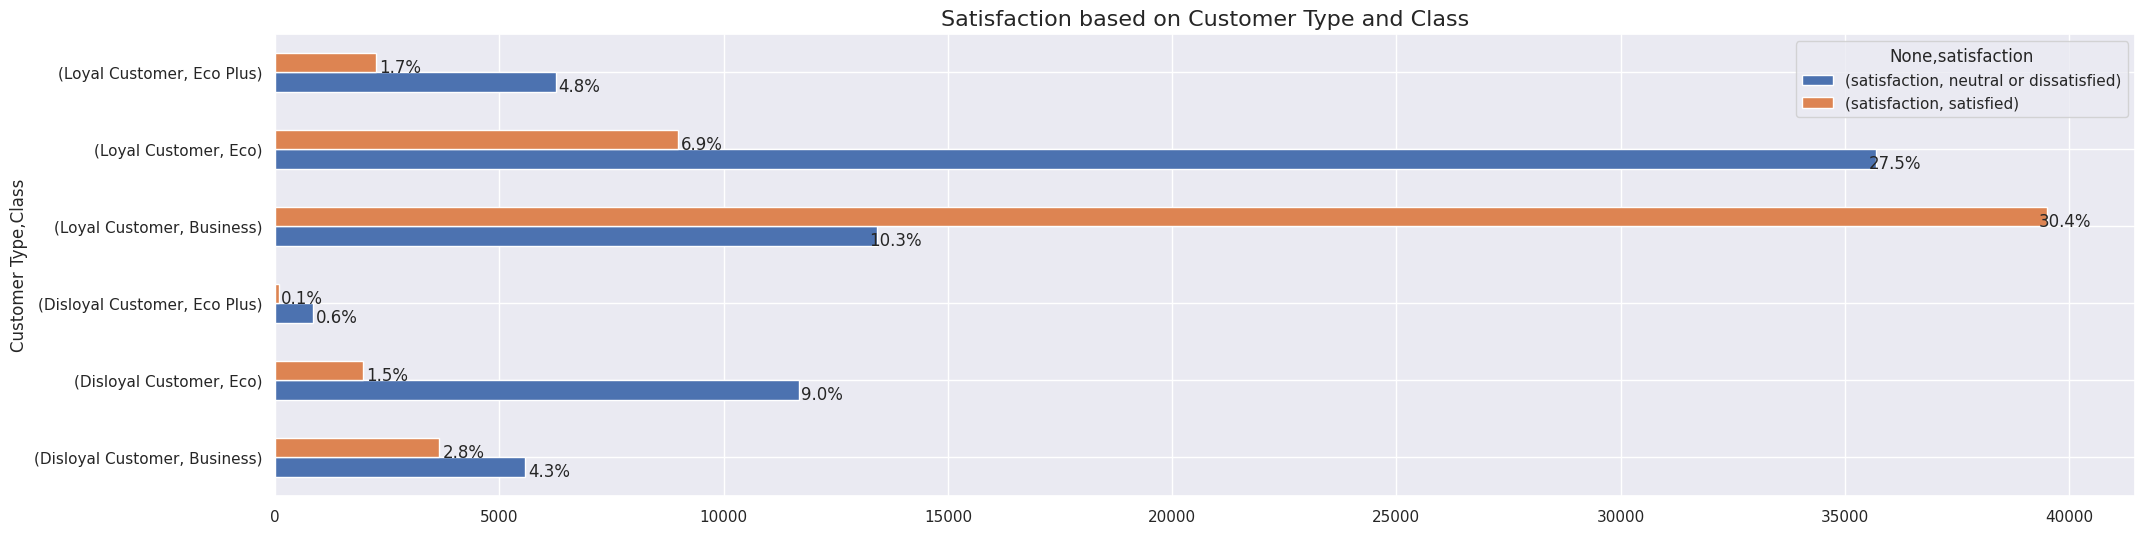

In [123]:
ax = data.pivot_table(index=["Customer Type","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
plt.title('Satisfaction based on Customer Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1000, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

- We can see that those who are loyal customers and in the business class are the passengers with the highest satisfaction rate (30.4%).
- Passengers who are loyal and in the eco class are the passengers with the highest dissatisfaction rate (27.5%).

In [124]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)

data.pivot_table(index=["Type of Travel","Class"],columns=["satisfaction"],aggfunc={"satisfaction":["count",percentage]})

satisfaction            \
                                           count             
satisfaction             neutral or dissatisfied satisfied   
Type of Travel  Class                                        
Business Travel Business                   16634     42853   
                Eco                        17726      7578   
                Eco Plus                    2977      1925   
Personal Travel Business                    2360       313   
                Eco                        29640      3365   
                Eco Plus                    4115       394   

                                                            
                                      percentage            
satisfaction             neutral or dissatisfied satisfied  
Type of Travel  Class                                       
Business Travel Business                   12.81     32.99  
                Eco                        13.65      5.83  
                Eco Plus                    2.29      1.48  
Personal Travel Business                    1.82      0.24  
                Eco                        22.82      2.59  
                Eco Plus                    3.17      0.30

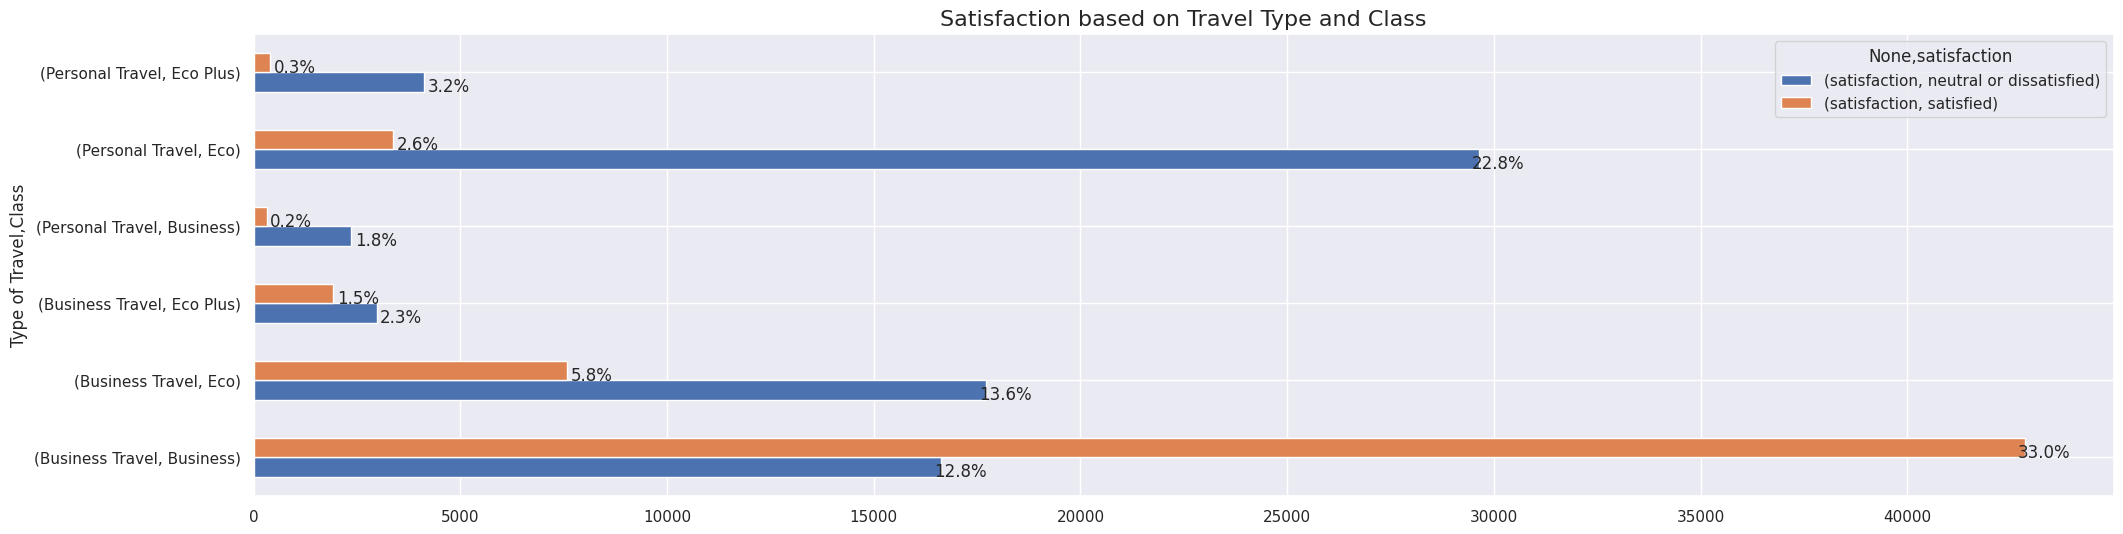

In [125]:
ax = data.pivot_table(index=["Type of Travel","Class"],columns=["satisfaction"],aggfunc={"satisfaction":"count"}).plot(kind="barh",figsize=(24,6))
plt.title('Satisfaction based on Travel Type and Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x,y  = p.get_x() + p.get_width()+1100, p.get_y()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

- Business class passengers making business travel have the highest satisfaction rate (33.0%). Eco class passengers who make personal travel have the highest dissatisfaction rate (22.8%). We can say that travel type and class are both major factors in satisfaction.

In [126]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)
data.pivot_table(index=["Gender","Customer Type"],columns=["Inflight wifi service"],aggfunc={"satisfaction":["count",percentage]})

satisfaction                                   \
                                count                                    
Inflight wifi service               0     1      2      3      4     5   
Gender Customer Type                                                     
Female Disloyal Customer          470  2040   3344   3301   2523  1165   
       Loyal Customer            1530  9313  13202  13025   9961  6025   
Male   Disloyal Customer          409  1653   2750   2785   2252  1088   
       Loyal Customer            1507  9322  13024  13074  10039  6078   

                                                                     
                         percentage                                  
Inflight wifi service             0     1      2      3     4     5  
Gender Customer Type                                                 
Female Disloyal Customer       0.36  1.57   2.57   2.54  1.94  0.90  
       Loyal Customer          1.18  7.17  10.16  10.03  7.67  4.64  
Male   Disloyal Customer       0.31  1.27   2.12   2.14  1.73  0.84  
       Loyal Customer          1.16  7.18  10.03  10.07  7.73  4.68

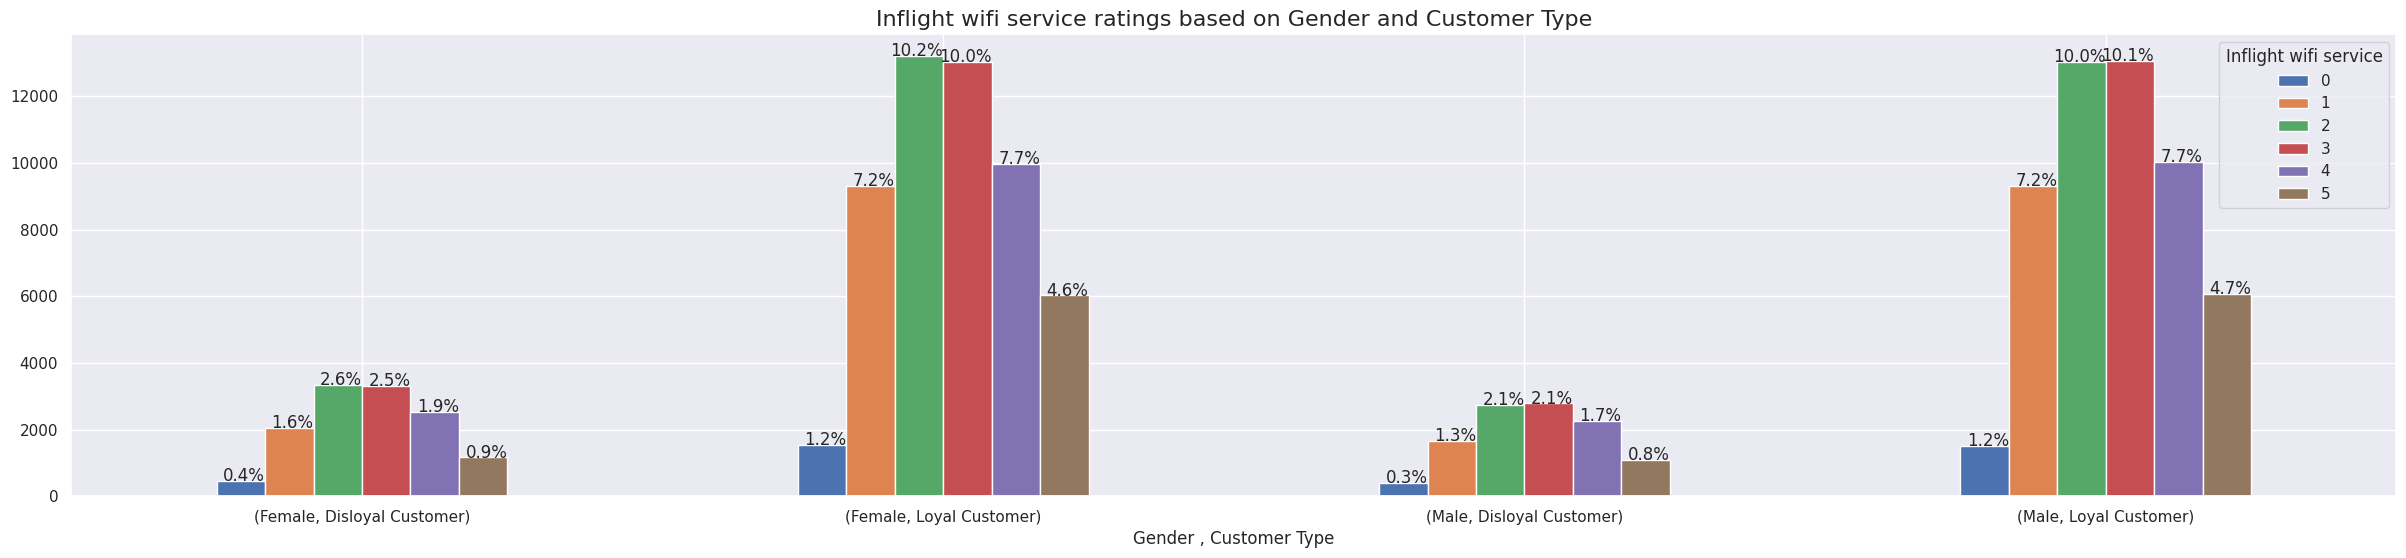

In [127]:
ax = pd.crosstab([data["Gender"], data["Customer Type"]],data["Inflight wifi service"],
            rownames=['Gender ', " Customer Type"],
            colnames=["Inflight wifi service"],
            dropna=False).plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Inflight wifi service ratings based on Gender and Customer Type', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

- When we compare the scores given to the service based on gender and customer type, we see a similar distribution. Since the number of loyal customers is high in data, their ratio seems to be higher. Gender is not a discriminative factor in scores.

In [128]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)
data.pivot_table(index="Class",columns=["Food and drink"],aggfunc={"satisfaction":["count",percentage]})

satisfaction                                               \
                      count                                   percentage   
Food and drink            0     1      2      3      4      5          0   
Class                                                                      
Business                 37  5369  13226  13443  15585  14500       0.03   
Eco                      73  9257  12197  12367  12853  11562       0.06   
Eco Plus                 22  1425   1960   1984   2125   1895       0.02   

                                                  
                                                  
Food and drink     1      2      3      4      5  
Class                                             
Business        4.13  10.18  10.35  12.00  11.16  
Eco             7.13   9.39   9.52   9.90   8.90  
Eco Plus        1.10   1.51   1.53   1.64   1.46

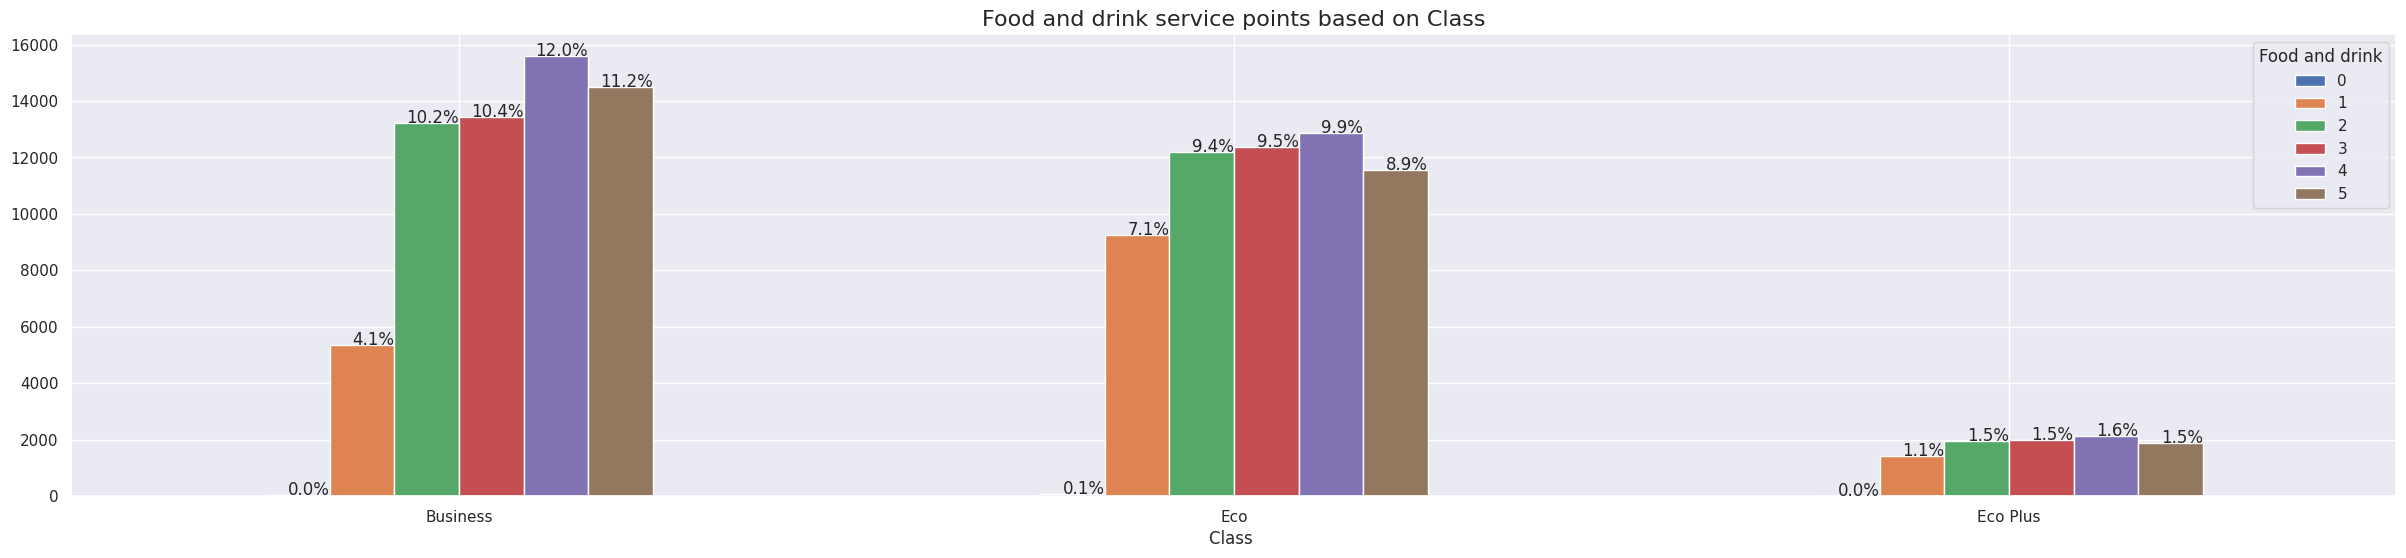

In [129]:
ax = pd.crosstab(data["Class"],data["Food and drink"],
            rownames=['Class '],
            colnames=['Food and drink'],
            dropna=False).plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Food and drink service points based on Class', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

- The number of passengers in the eco plus class is low in the data. The number of business class passengers and eco class passengers is very close to each other. Business class passengers seem to give more points to the food and drink service.

In [130]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)
data.pivot_table(index=["Type of Travel","Cleanliness"],columns=['satisfaction'],aggfunc={"satisfaction":["count",percentage]},fill_value=0)

satisfaction            \
                                              count             
satisfaction                neutral or dissatisfied satisfied   
Type of Travel  Cleanliness                                     
Business Travel 0                                14         0   
                1                              7591      2606   
                2                              9160      3533   
                3                              9243     12383   
                4                              7592     17250   
                5                              3737     16584   
Personal Travel 1                              5843       689   
                2                              6676       744   
                3                              8127       886   
                4                              8194       933   
                5                              7275       820   

                                                               
                                         percentage            
satisfaction                neutral or dissatisfied satisfied  
Type of Travel  Cleanliness                                    
Business Travel 0                              0.01      0.00  
                1                              5.84      2.01  
                2                              7.05      2.72  
                3                              7.12      9.53  
                4                              5.85     13.28  
                5                              2.88     12.77  
Personal Travel 1                              4.50      0.53  
                2                              5.14      0.57  
                3                              6.26      0.68  
                4                              6.31      0.72  
                5                              5.60      0.63

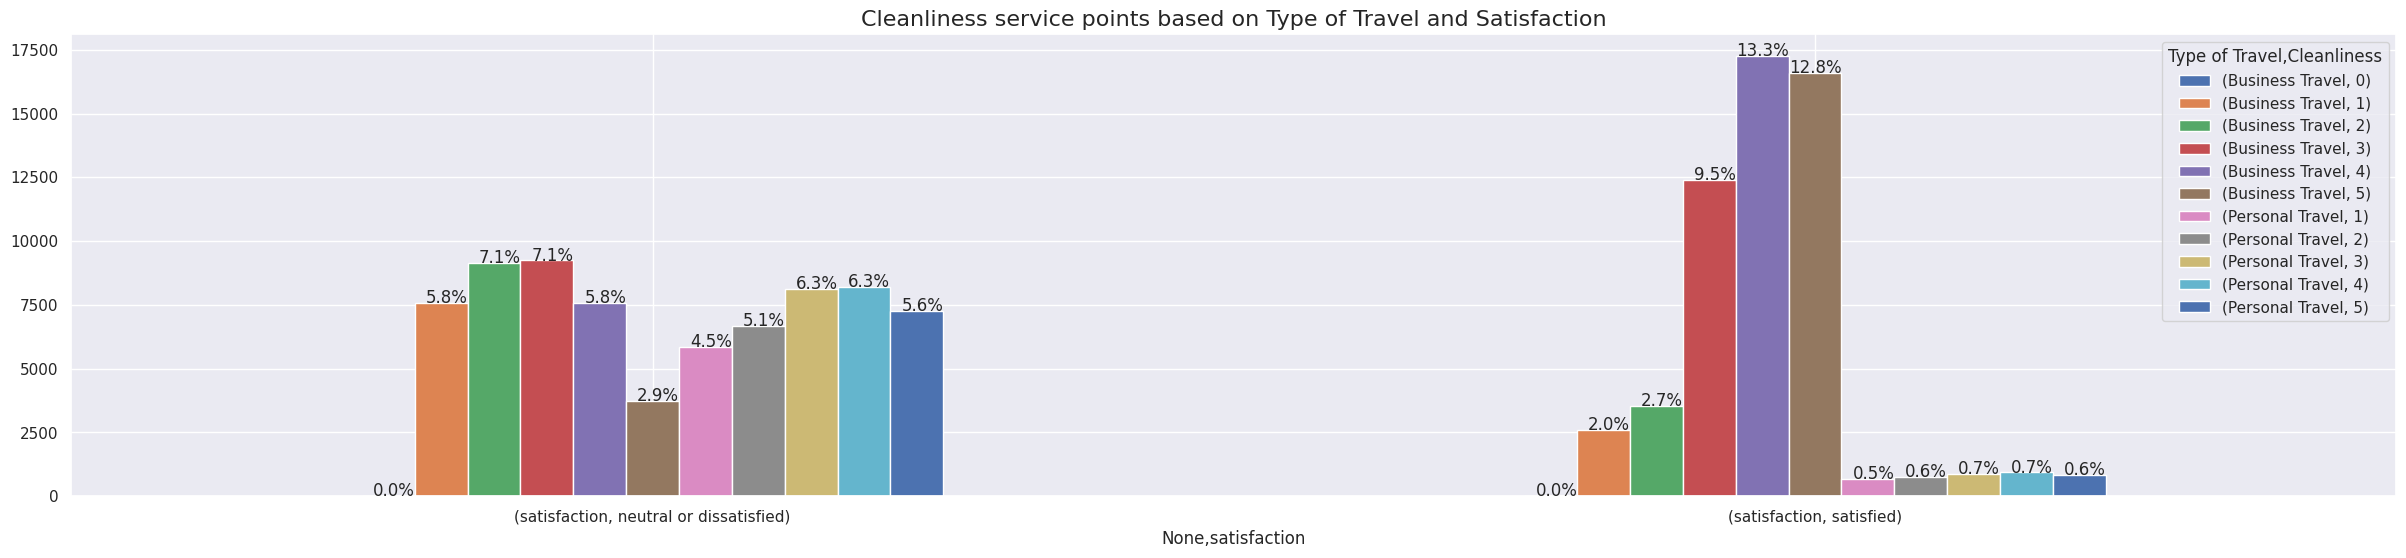

In [131]:
ax = data.pivot_table(index=["Type of Travel","Cleanliness"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0).T.plot(kind="bar",figsize=(30,6),rot=0)
plt.title('Cleanliness service points based on Type of Travel and Satisfaction', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

- While business travel passengers were more satisfied, personal travel passengers were more dissatisfied. Neutral or dissatisfied passengers give similar rates to cleanliness regardless of the type of travel. But among satisfied passengers, business travel passengers give more points to cleanliness. The number of passengers who are satisfied and make personal travel is quite low.

- Dividing age column to four groups by looking at the quartiles to check if any pattern will be seen in different groups

In [132]:
def percentage(x):
  return round(100*x.count()/data.shape[0],2)
data["Age Group"]=pd.cut(data.Age,[np.min(data.Age),np.percentile(data.Age,25),np.percentile(data.Age,50),np.percentile(data.Age,75),np.max(data.Age)+1], right=False)

In [133]:
data[["Age","Age Group"]][:5]

Age     Age Group
0   13   [7.0, 27.0)
1   25   [7.0, 27.0)
2   26   [7.0, 27.0)
3   25   [7.0, 27.0)
4   61  [51.0, 86.0)

In [134]:
table2=data.pivot_table(index=["Age Group"],columns=["satisfaction"],aggfunc={"satisfaction":"count"},fill_value=0)
table2

satisfaction          
satisfaction neutral or dissatisfied satisfied
Age Group                                     
[7.0, 27.0)                    22085      8910
[27.0, 40.0)                   19779     13289
[40.0, 51.0)                   13579     18636
[51.0, 86.0)                   18009     15593

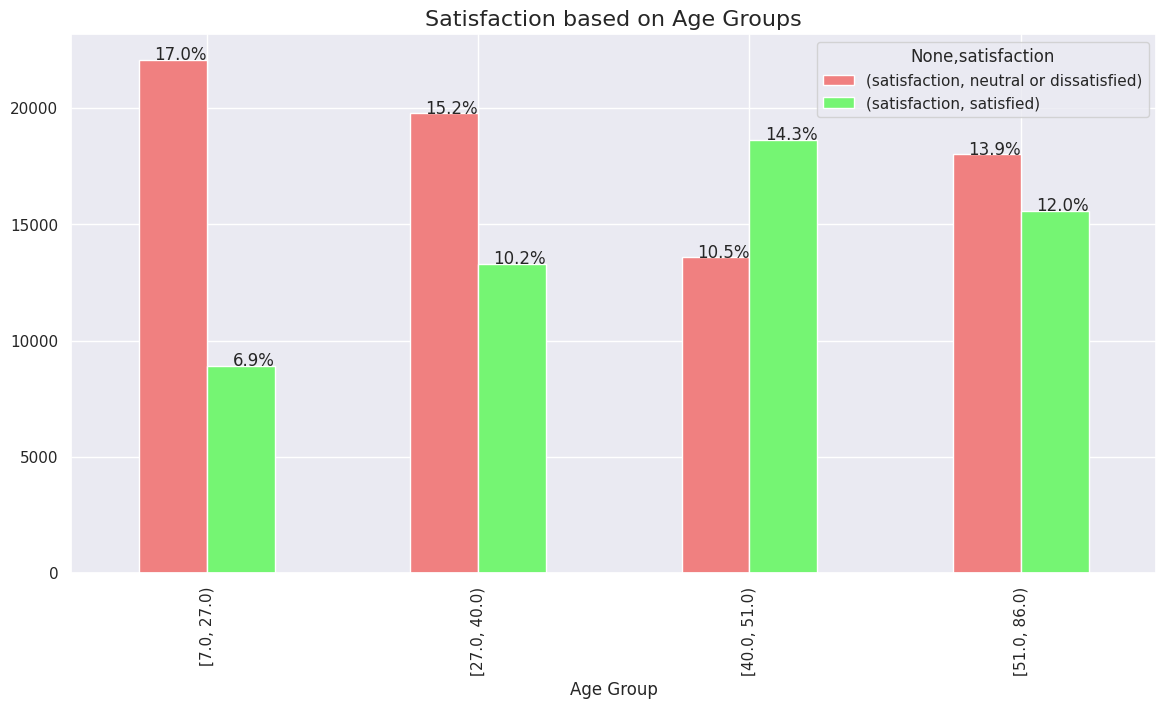

In [135]:
ax = table2.plot(kind="bar", figsize=(14,7), color=["#f08080","#75f573"])
plt.title('Satisfaction based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

- While the majority of passengers between the ages of [40,51) are satisfied, the rate of dissatisfaction is higher for passengers in other age ranges.

In [136]:
table3 = data.pivot_table(index=["Age Group"],columns=["Baggage handling"],aggfunc={"Baggage handling":"count"})
table3

Baggage handling                         
Baggage handling                1     2     3      4     5
Age Group                                                 
[7.0, 27.0)                  1652  2624  7082  11916  7721
[27.0, 40.0)                 2150  3441  7196  12089  8192
[40.0, 51.0)                 2294  3826  5497  11465  9133
[51.0, 86.0)                 2932  4471  6076  11291  8832

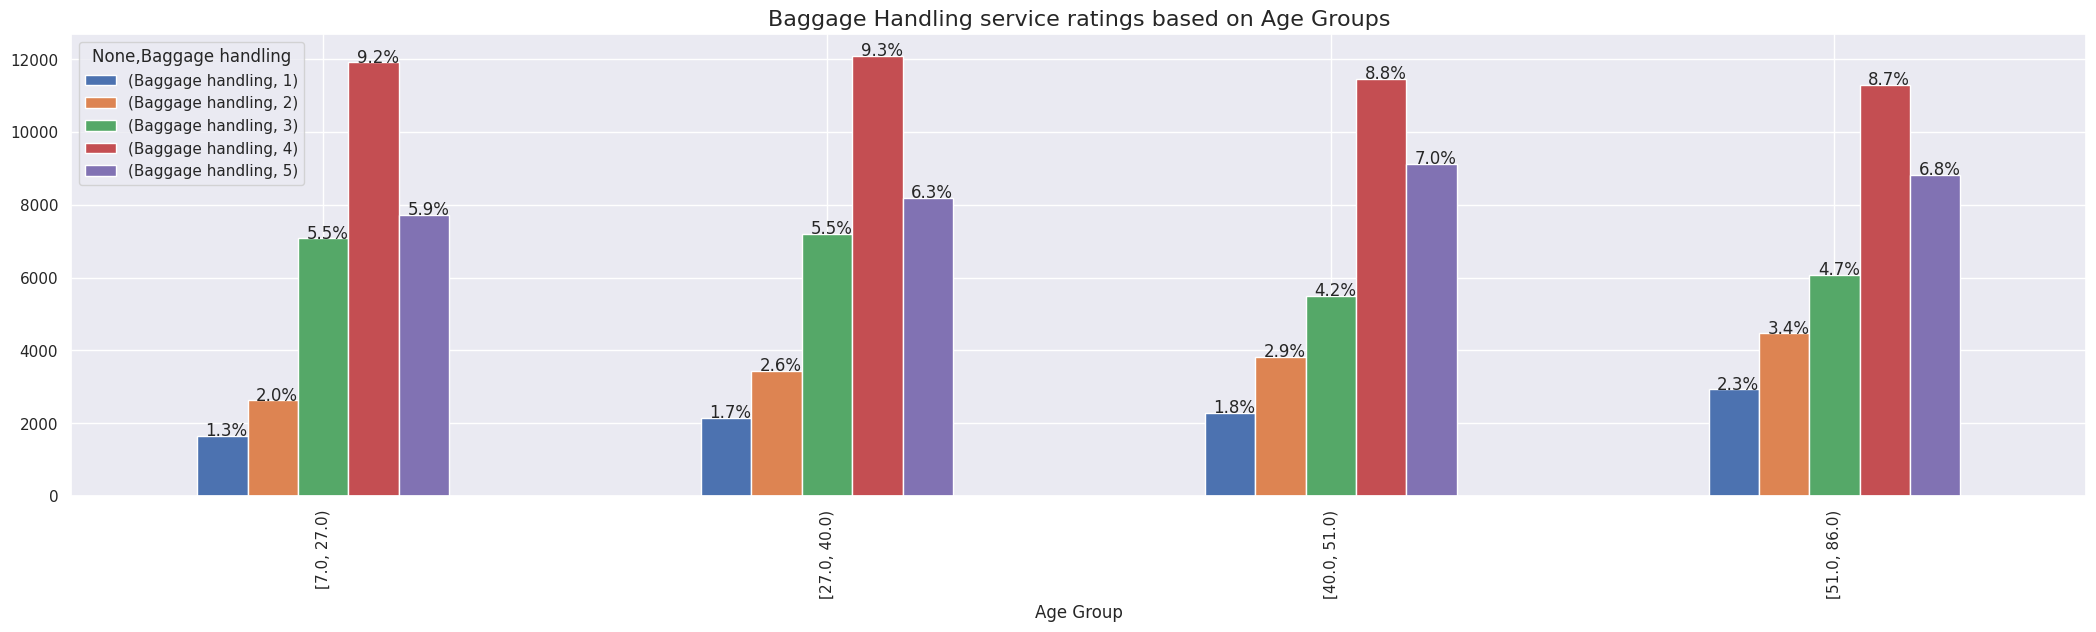

In [137]:
ax = table3.plot(kind="bar",figsize=(26,6))
plt.title('Baggage Handling service ratings based on Age Groups', fontsize=16)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x, y = p.get_x() + p.get_width(), p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

- When we look at the scores given to the baggage handling service by dividing the age groups, we can say that the scores are similar among age groups. I can say that age groups do not have an obvious effect on the scores.

In [138]:
data[(data['Departure Delay in Minutes'] == 0 ) & (data['Arrival Delay in Minutes'] == 0 )].groupby('satisfaction')["id"].count().reset_index().set_index("satisfaction")

id
satisfaction                  
neutral or dissatisfied  31345
satisfied                28006

- When we look at the flights that do not delay on arrival and departure, the number of satisfied passenger still seems less.

### Visualizing numeric features

Creating a pairplot to see the distribution of numeric features and their relation with other numeric features.M

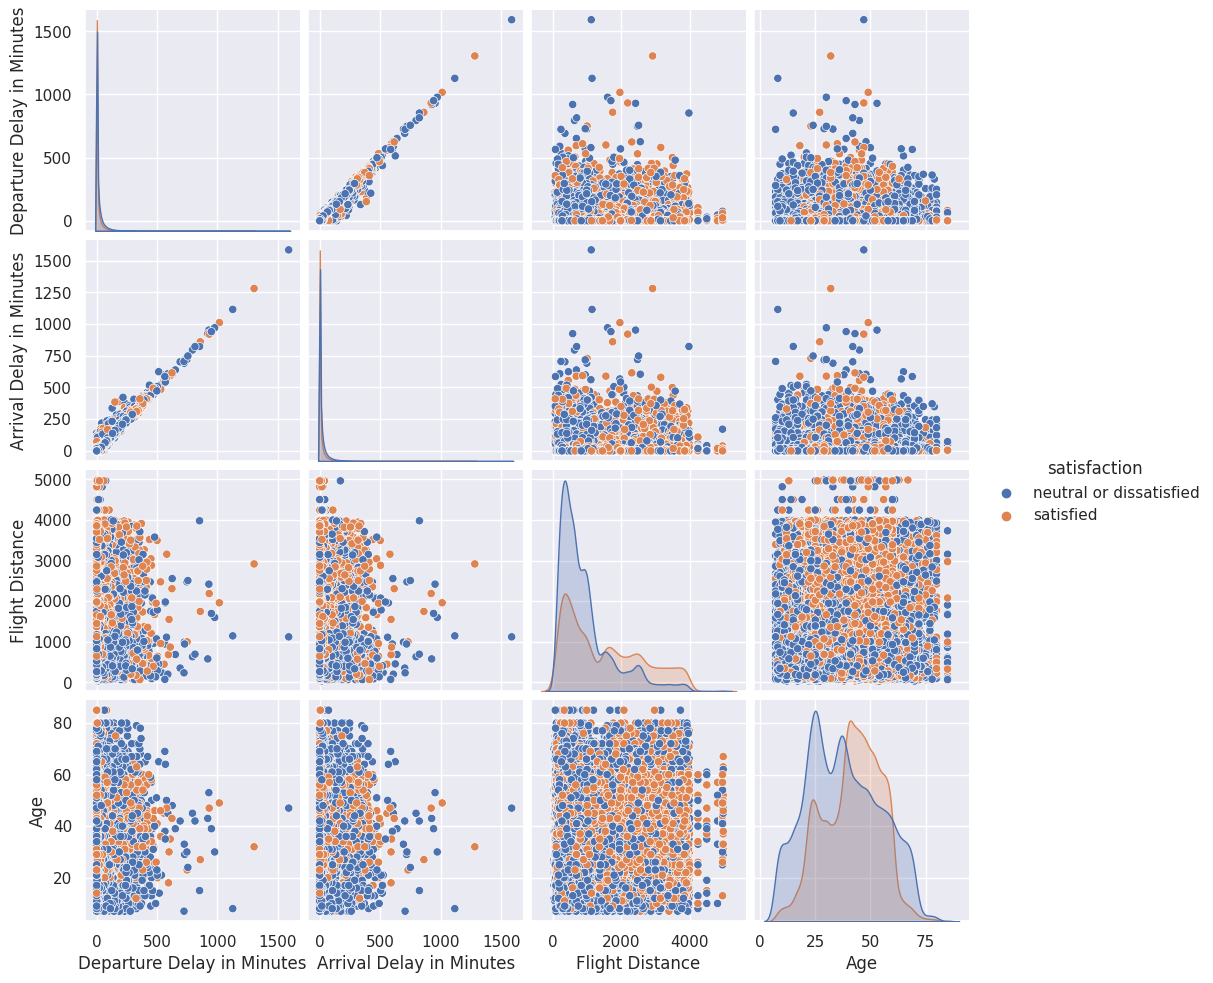

In [139]:
numerics=['Departure Delay in Minutes', 'Arrival Delay in Minutes','Flight Distance',"Age"]
data = data.reset_index()
sns.pairplot(data[[*numerics,'satisfaction']],hue="satisfaction")
plt.show()

- While there is a visible relationship between some numeric features (Arrival_Delay_in_Minutes and Departure_Delay_in_Minute), some are unrelated to each other (Flight_Distance and Age).

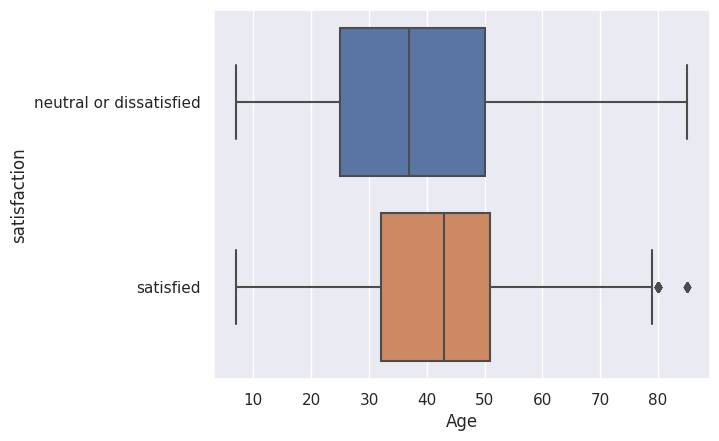

In [140]:
sns.boxplot(x="Age",y="satisfaction",data=data)
plt.show()

- Checking outliers with boxplot

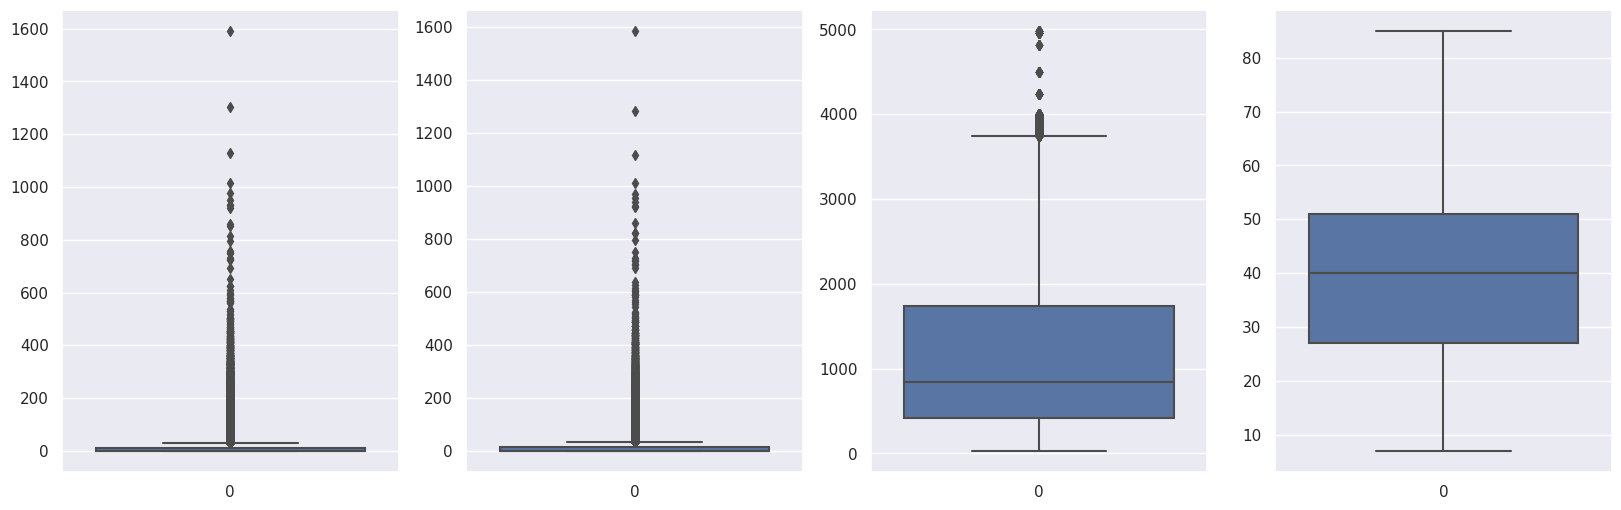

In [141]:
plt.figure(figsize=(20, 6))
for i,j in enumerate(numerics):
  plt.subplot(1,len(numerics),i+1)
  sns.boxplot(data[j])

- There are outliers in data. I will handle them later.

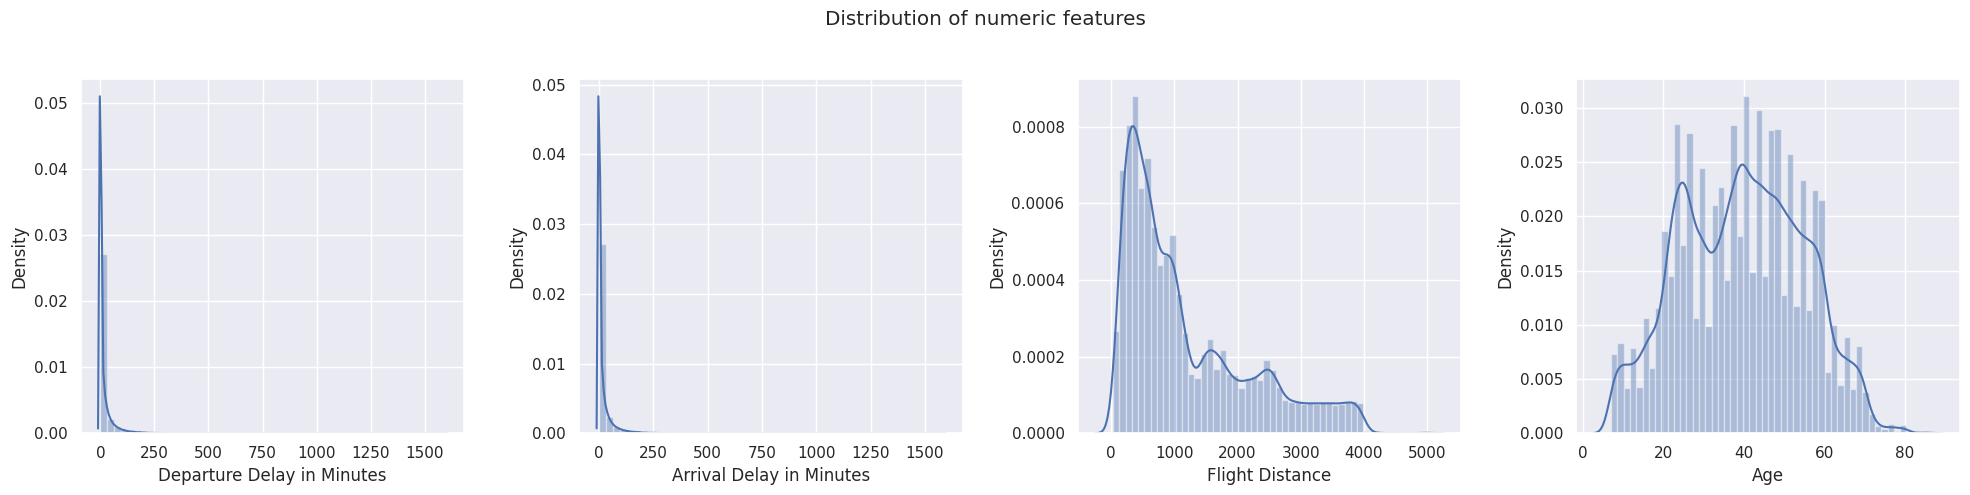

In [142]:
fig, ax = plt.subplots(1,len(numerics),figsize=(20,5))
fig.suptitle("Distribution of numeric features",y=1)
for i,j in enumerate(numerics):
  sns.distplot(x=data[j],ax=ax[i])
  ax[i].set_xlabel(j)
fig.tight_layout(pad=1.5)

- Arrival_Delay_in_Minutes and Departure_Delay_in_Minutes columns show a maximum value at 0. As the delay minutes increase, occurrences decrease. We see that the values in the Flight_Distance column are mostly concentrated in the 0-1000 range. Also there are people of all ages in the data.

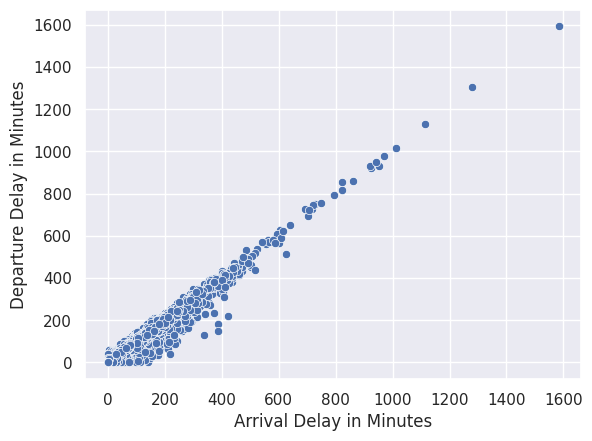

In [143]:
sns.scatterplot(x=data['Arrival Delay in Minutes'],y=data['Departure Delay in Minutes'])
plt.show()

In [144]:
data[['Arrival Delay in Minutes','Departure Delay in Minutes']].corr()

Arrival Delay in Minutes  \
Arrival Delay in Minutes                    1.000000   
Departure Delay in Minutes                  0.965291   

                            Departure Delay in Minutes  
Arrival Delay in Minutes                      0.965291  
Departure Delay in Minutes                    1.000000

- Arrival_Delay_in_Minutes and Departure_Delay_in_Minutes columns are highly positive correlated. Correlated features will be checked again with heatmap.

#### Dropping unnecessary columns

In [145]:
data.drop(["Unnamed: 0","id","Age Group"],axis=1,inplace=True)
data_backup=data.copy()
data.head()

index  Gender      Customer Type  Age   Type of Travel     Class  \
0      0    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1      1    Male  Disloyal Customer   25  Business Travel  Business   
2      2  Female     Loyal Customer   26  Business Travel  Business   
3      3  Female     Loyal Customer   25  Business Travel  Business   
4      4    Male     Loyal Customer   61  Business Travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

#### Checking correlation between features by creating a heatmap

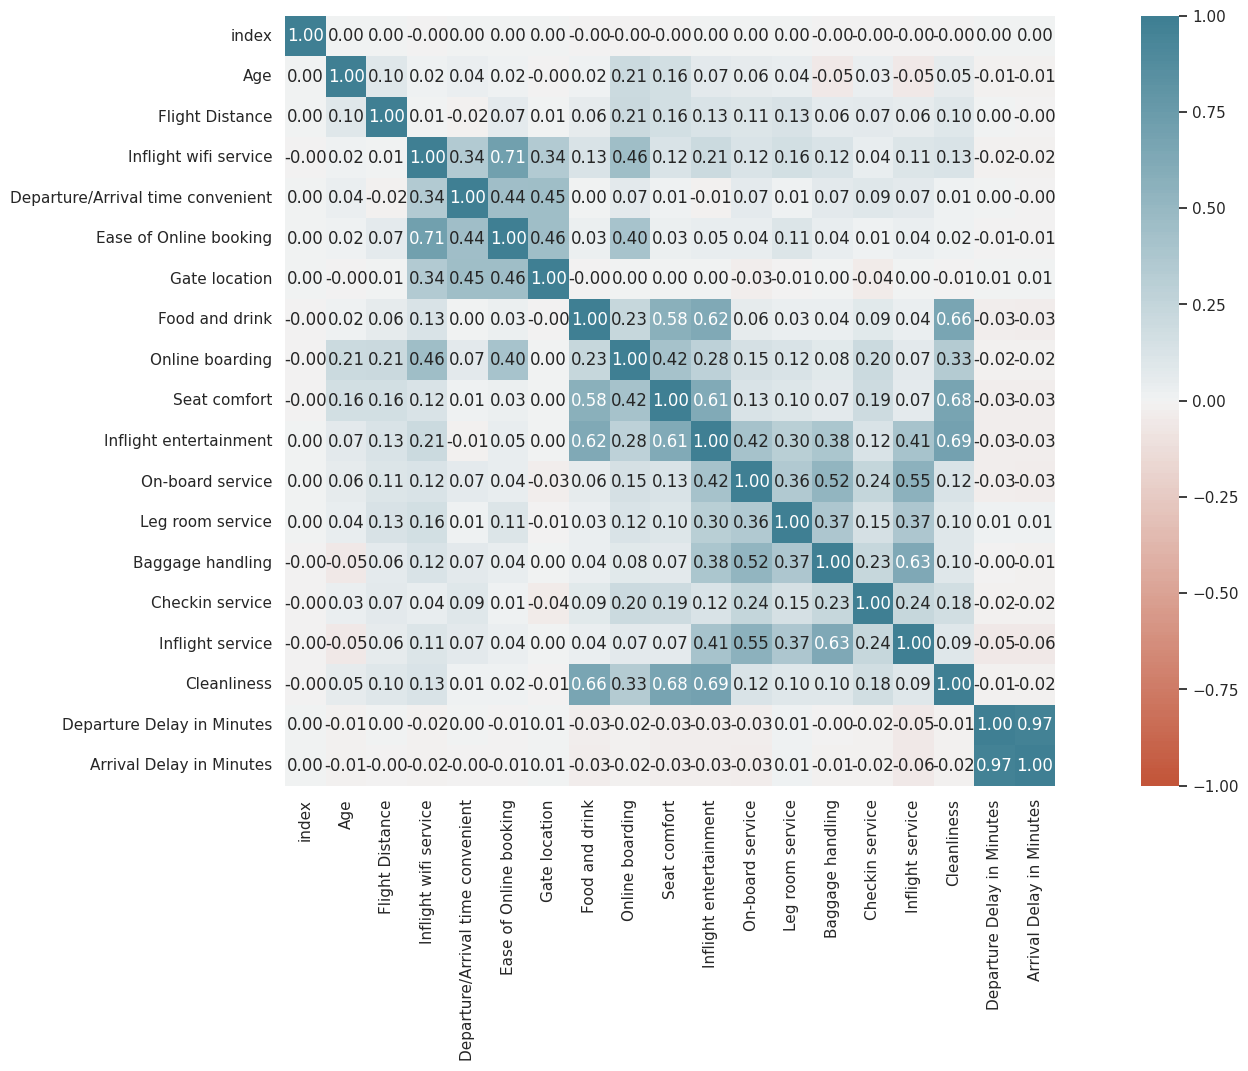

In [146]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True,fmt='.2f',)
plt.show()

##### Insights

- "Ease of Online booking" and "Inflight wifi service" are positive correlated with ratio 0.71.
- "Inflight entertainment" and "Food and drink" are positive correlated with ratio 0.62.
- "Inflight entertainment" and "Seat comfort" are positive correlated with ratio 0.61.
- "Inflight service" and "Baggage handling" are positive correlated with ratio 0.63.
- "Cleanliness" and "Food and drink" are positive correlated with ratio 0.66.
- "Cleanliness" and "Seat comfort" are positive correlated with ratio 0.68.
- "Cleanliness" and "Inflight entertainment" are positive correlated with ratio 0.69.

'Departure delay in minutes' and 'Arrival delay in minutes' columns are highly positive correlated (0.97) as we have seen. Normally we should drop one of them. Since 'Arrival_Delay_in_Minutes' column has null values, it would be our first choice. But 'Departure delay in minutes' and 'Arrival_Delay_in_Minutes' columns have full of zero values, so they are not very important features in model. I will drop both of these columns.

In [147]:
data.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1,inplace=True)

### Checking correlation to target

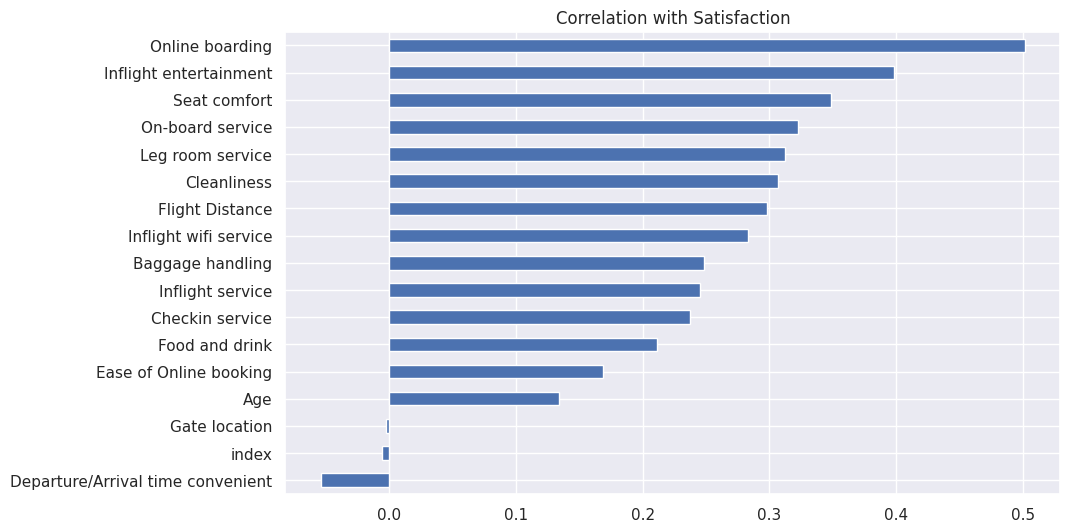

In [148]:
data_temp=data.copy()
data_temp["satisfaction"]=data_temp["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
data_temp.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='barh',title="Correlation with Satisfaction",figsize=(10,6))
plt.show()

Features that slightly correlates more with customer satisfaction are 'Inflight wifi service', 'Flight Distance', 'Cleanliness', 'Leg room service', 'On-board service', 'Seat comfort', 'Inflight entertainment',and 'Online boarding'.

Among features "Online boarding" has the maximum correlation to target, i will check its correlation with other features.

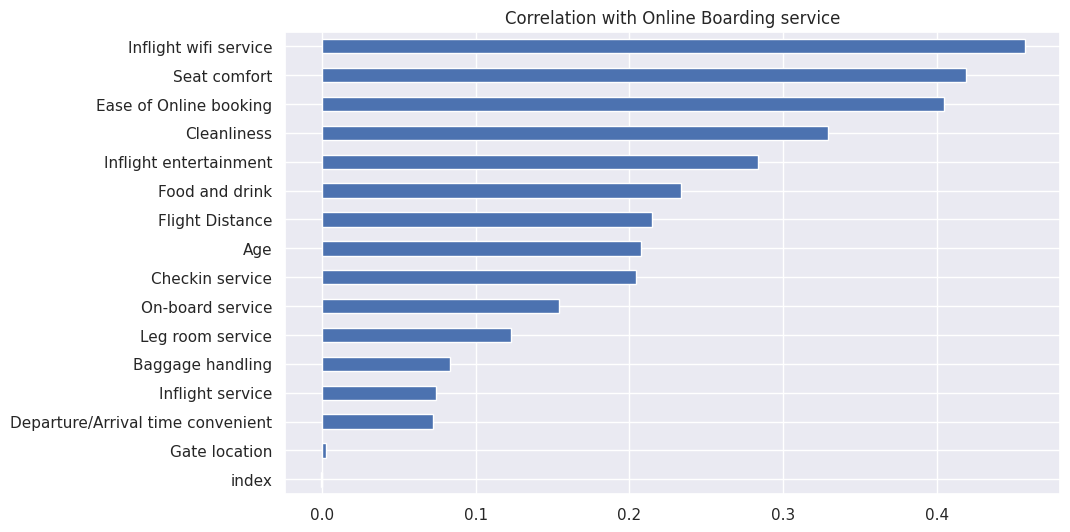

In [149]:
data_temp.corr()['Online boarding'].sort_values().drop(['Online boarding','satisfaction']).plot(kind='barh',title="Correlation with Online Boarding service",figsize=(10,6))
plt.show()

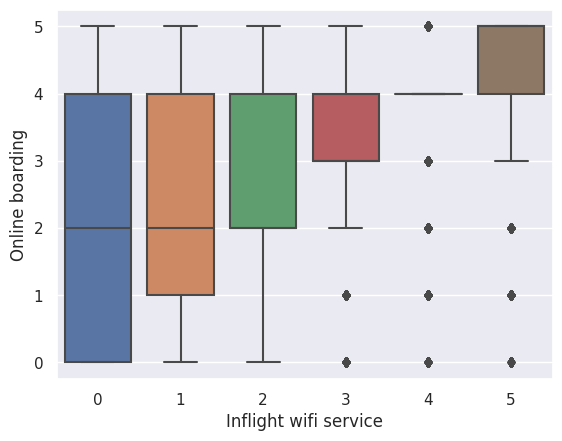

In [150]:
sns.boxplot(x=data['Inflight wifi service'], y = data_temp['Online boarding'])
plt.show()

As the score given to the Inflight wifi service increases, the range distributed to online boarding decreases and its score increases. People who gets better service of inflight wifi are more likely to give better rating for online boarding.

## PRE-PROCESSING

#### Encoding categoric features

In [151]:
data.head()

index  Gender      Customer Type  Age   Type of Travel     Class  \
0      0    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1      1    Male  Disloyal Customer   25  Business Travel  Business   
2      2  Female     Loyal Customer   26  Business Travel  Business   
3      3  Female     Loyal Customer   25  Business Travel  Business   
4      4    Male     Loyal Customer   61  Business Travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Online boarding  Seat comfort  \
0                       3  ...                3             5   
1                       3  ...                3             1   
2                       2  ...                5             5   
3                       5  ...                2             2   
4                       3  ...                5             5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 22 columns]

In [152]:
#categorics
data[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].head()

Gender      Customer Type   Type of Travel     Class  \
0    Male     Loyal Customer  Personal Travel  Eco Plus   
1    Male  Disloyal Customer  Business Travel  Business   
2  Female     Loyal Customer  Business Travel  Business   
3  Female     Loyal Customer  Business Travel  Business   
4    Male     Loyal Customer  Business Travel  Business   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

- We have to transform our categoric features to numerics so our model can understand better and learn from the features.

In [153]:
#mapping ordinal features
data["Class"] = data["Class"].map({'Business':2, 'Eco Plus':1, 'Eco':0})
data["satisfaction"]=data["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [154]:
data = data.drop('index',axis=1)
data.head()

Gender      Customer Type  Age   Type of Travel  Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel      1              460   
1    Male  Disloyal Customer   25  Business Travel      2              235   
2  Female     Loyal Customer   26  Business Travel      2             1142   
3  Female     Loyal Customer   25  Business Travel      2              562   
4    Male     Loyal Customer   61  Business Travel      2              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Online boarding  Seat comfort  \
0                       3              1  ...                3             5   
1                       3              3  ...                3             1   
2                       2              2  ...                5             5   
3                       5              5  ...                2             2   
4                       3              3  ...                5             5   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   
2                       5                 4                 3   
3                       2                 2                 5   
4                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 21 columns]

In [155]:
#for nominal features,
data_new=pd.get_dummies(data,drop_first=True)
#i use drop_first parameter so my model does not get any confusion by counting some features second time
data_new.reset_index(inplace=True)
data_new.drop("index",axis=1,inplace=True)
data_new.head()

Age  Class  Flight Distance  Inflight wifi service  \
0   13      1              460                      3   
1   25      2              235                      3   
2   26      2             1142                      2   
3   25      2              562                      2   
4   61      2              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  ...  On-board service  \
0               5                3             5  ...                 4   
1               1                3             1  ...                 1   
2               5                5             5  ...                 4   
3               2                2             2  ...                 2   
4               4                5             5  ...                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  satisfaction  Gender_Male  Customer Type_Loyal Customer  \
0            5             0            1                             1   
1            1             0            1                             0   
2            5             1            0                             1   
3            2             0            0                             1   
4            3             1            1                             1   

   Type of Travel_Personal Travel  
0                               1  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 21 columns]

In [156]:
data_new[["Gender_Male","Customer Type_Loyal Customer","Type of Travel_Personal Travel","Class","satisfaction"]].head()

Gender_Male  Customer Type_Loyal Customer  Type of Travel_Personal Travel  \
0            1                             1                               1   
1            1                             0                               0   
2            0                             1                               0   
3            0                             1                               0   
4            1                             1                               0   

   Class  satisfaction  
0      1             0  
1      2             0  
2      2             1  
3      2             0  
4      2             1

### Outlier Detection

I will use Local Outlier Factor Method to detect and drop outliers.

In [157]:
from sklearn.neighbors import LocalOutlierFactor

df_local=data_new.copy()
temp = df_local.drop("satisfaction", axis=1)
local_outlier = LocalOutlierFactor(n_neighbors=2).fit_predict(temp)
outlier_local=list(np.where(local_outlier == -1)[0])
del temp
print(f"Outlier Count: {len(outlier_local)} \nSample Count: {len(df_local)} \nFraction: {round(len(outlier_local)/len(df_local),3)}")
df_local=df_local.drop(outlier_local).reset_index(drop=True)

Outlier Count: 1520 
Sample Count: 129880 
Fraction: 0.012


### Feature Transformation

The assumptions of some machine learning models are based on the normality of features. I will try to make the distribution of my features look like a normal distribution with some transformation operations. Different methods can be used to see which one is better for the data. I will mostly check "Flight_Distance' and "Age" columns.

Methods i use:

1. Log Transformation
2. Square Root Transformation
3. Box Cox Transformation

In [158]:
from scipy import stats
from scipy.stats import boxcox

In [159]:
#Log Transformation
df_log=df_local.copy()
df_log["Flight Distance"]=np.log(df_log["Flight Distance"])
df_log["Age"]=np.log(df_log["Age"])

In [160]:
#Square-Root Transformation
df_sqrt=df_local.copy()
df_sqrt["Flight Distance"]=np.sqrt(df_sqrt["Flight Distance"])
df_sqrt["Age"]=np.sqrt(df_sqrt["Age"])

In [161]:
#Box Cox Transformation
df_boxcox=df_local.copy()
df_boxcox["Flight Distance"],lmbda=boxcox(df_boxcox["Flight Distance"],lmbda=None)
df_boxcox["Age"],lmbda=boxcox(df_boxcox["Age"],lmbda=None)

#### Visualizing Transformed Features

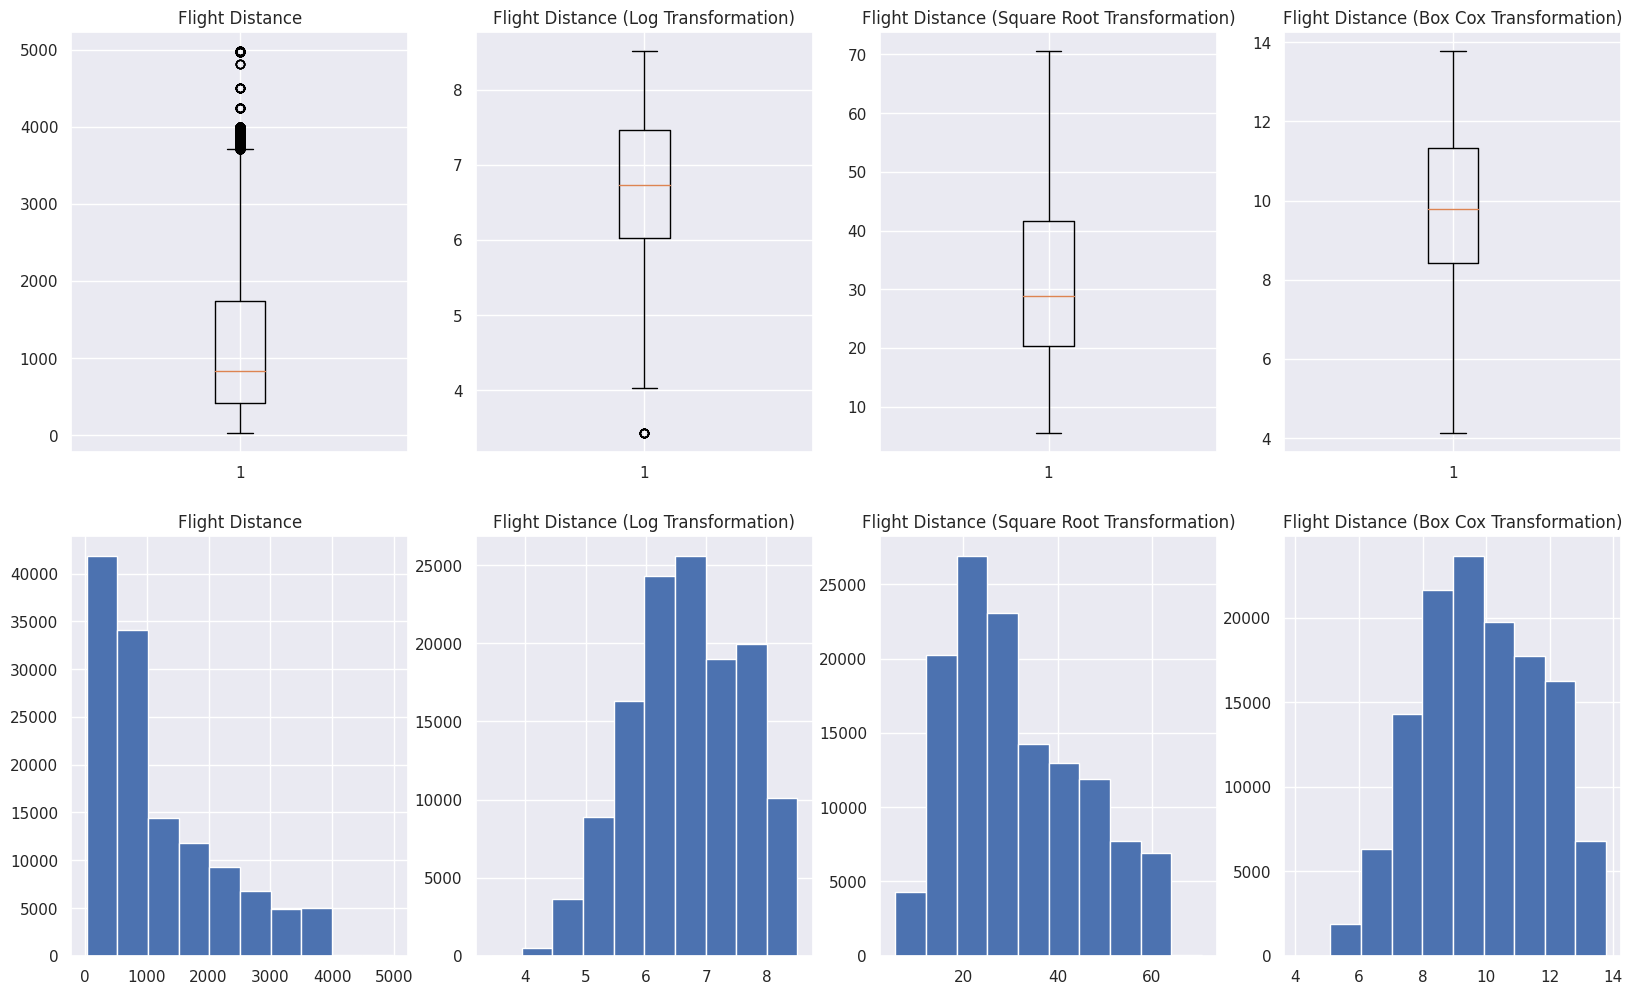

In [162]:
#Flight Distance feature
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df_local['Flight Distance'])
plt.title('Flight Distance')

plt.subplot(2, 4, 2)
plt.boxplot(df_log["Flight Distance"])
plt.title('Flight Distance (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(df_sqrt['Flight Distance'])
plt.title('Flight Distance (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(df_boxcox['Flight Distance']);
plt.title('Flight Distance (Box Cox Transformation)')

plt.subplot(2, 4, 5)
plt.hist(df_local['Flight Distance'])
plt.title('Flight Distance')

plt.subplot(2, 4, 6)
plt.hist(df_log["Flight Distance"])
plt.title('Flight Distance (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(df_sqrt['Flight Distance'])
plt.title('Flight Distance (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(df_boxcox['Flight Distance']);
plt.title('Flight Distance (Box Cox Transformation)')

plt.show()

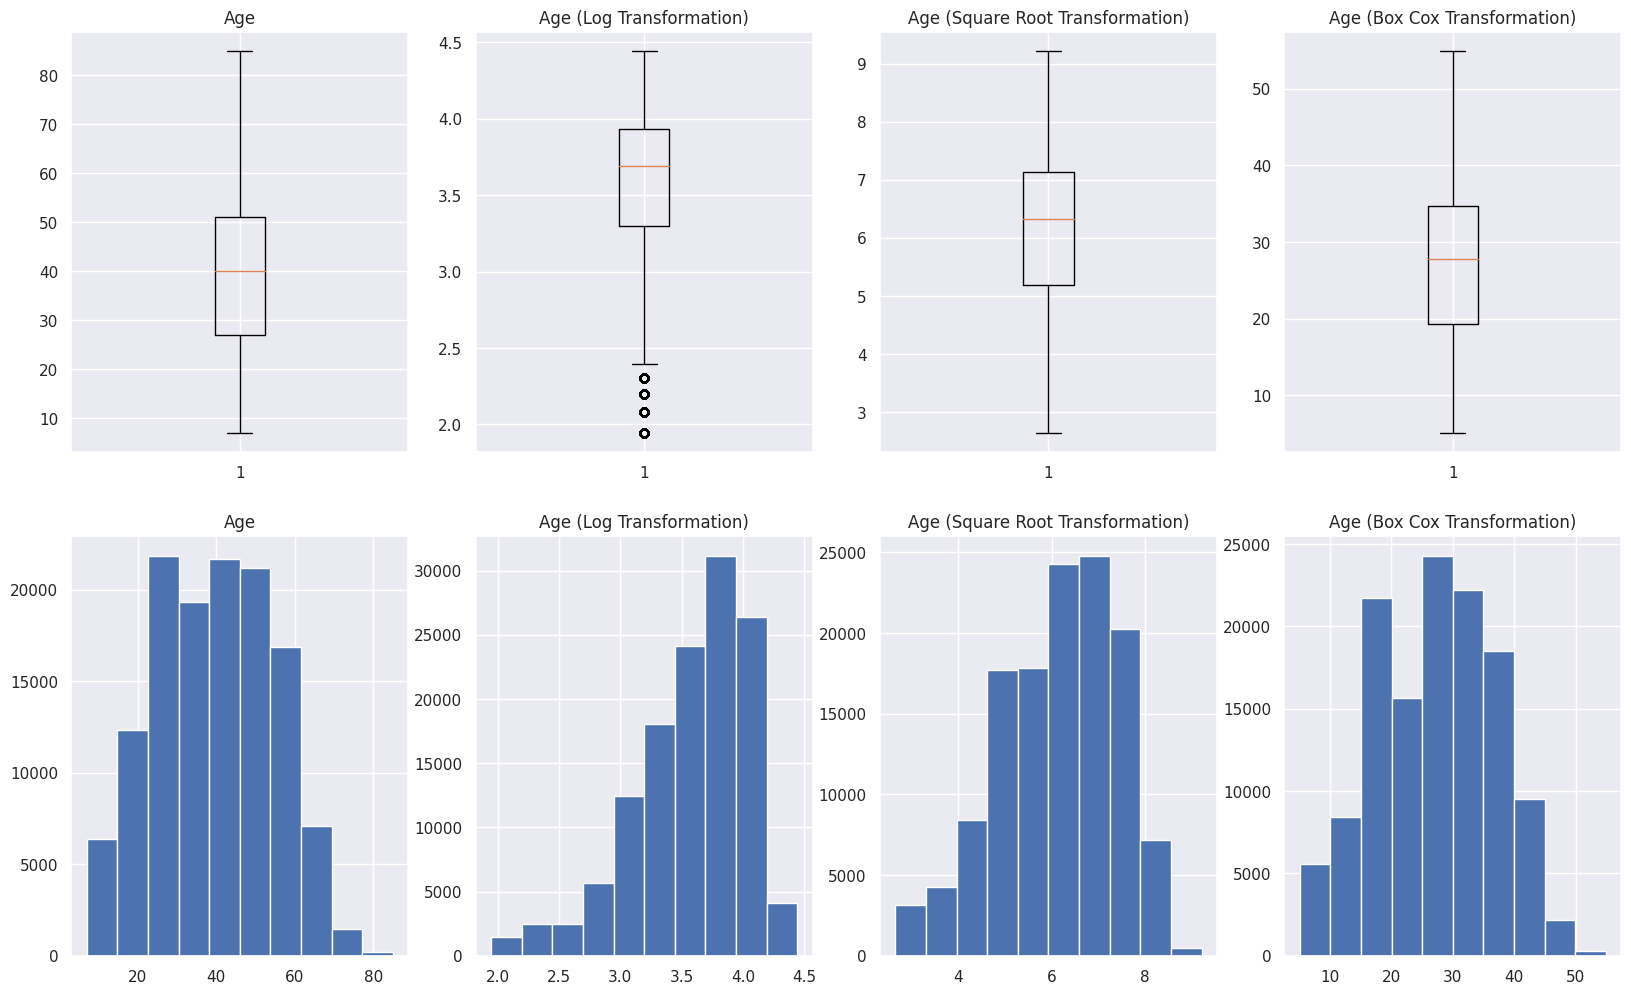

In [163]:
#Age Feature
plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.boxplot(df_local['Age'])
plt.title('Age')

plt.subplot(2, 4, 2)
plt.boxplot(df_log["Age"])
plt.title('Age (Log Transformation)')

plt.subplot(2, 4, 3)
plt.boxplot(df_sqrt['Age'])
plt.title('Age (Square Root Transformation)')

plt.subplot(2, 4, 4)
plt.boxplot(df_boxcox['Age']);
plt.title('Age (Box Cox Transformation)')

plt.subplot(2, 4, 5)
plt.hist(df_local['Age'])
plt.title('Age')

plt.subplot(2, 4, 6)
plt.hist(df_log["Age"])
plt.title('Age (Log Transformation)')

plt.subplot(2, 4, 7)
plt.hist(df_sqrt['Age'])
plt.title('Age (Square Root Transformation)')

plt.subplot(2, 4, 8)
plt.hist(df_boxcox['Age']);
plt.title('Age (Box Cox Transformation)')

plt.show()

Checking Normality of transformed features

In [67]:
for j in ["Flight Distance","Age"]:
  transforms=[df_local[j], df_log[j], df_sqrt[j], df_boxcox[j]]
  processes=["original","log","square root","box cox"]
  for i,k in zip(transforms,processes):
    print(f"Normality for {j} Feature ({k}):",stats.shapiro(i))

Normality for Flight Distance Feature (original): ShapiroResult(statistic=0.8628814220428467, pvalue=0.0)
Normality for Flight Distance Feature (log): ShapiroResult(statistic=0.9800863265991211, pvalue=0.0)
Normality for Flight Distance Feature (square root): ShapiroResult(statistic=0.949069082736969, pvalue=0.0)
Normality for Flight Distance Feature (box cox): ShapiroResult(statistic=0.9811432957649231, pvalue=0.0)
Normality for Age Feature (original): ShapiroResult(statistic=0.9882844686508179, pvalue=0.0)
Normality for Age Feature (log): ShapiroResult(statistic=0.9295377731323242, pvalue=0.0)
Normality for Age Feature (square root): ShapiroResult(statistic=0.9770567417144775, pvalue=0.0)
Normality for Age Feature (box cox): ShapiroResult(statistic=0.9878101348876953, pvalue=0.0)


#### Even if I do transformation, my features still do not have a normal distribution. That's why I'm going to continue without transformation.

#### Splitting data

Splitting data into train and test with 0.7 train/0.3 test ratio so i can train my model with train data, and then test its performance with test data.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df_local.drop("satisfaction",axis=1),df_local["satisfaction"],test_size=0.3,random_state=42)

In [69]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (89852, 20)
Test size: (38508, 20)


#### Feature Scaling

We use Feature Scaling to standardize the independent features in a fixed range so each feature contributes approximately to model. Due to my distribution, I can not use Standard Scaler. I use MinMax Scaler which transforms data range to (0,1).

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


### MODELS Used

- Gaussian Naive Bayes
- Linear SVC
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Voting Classifier
- Bagging Classifier
- Random Forest
- AdaBoost
- Stochastic Gradient Boosting
- XGBoost

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

In [73]:
#Creating a function that creates a dataframe for testing model performance
def model_perf(model,X_train,X_test,y_train,y_test,pred,model_name):
  """Takes the data, returns a dataframe that calculates the performance of the model"""
  cv_results=cross_val_score(model,X_train,y_train,cv=5)
  perf_df=pd.DataFrame({"Mean_CV":np.mean(cv_results),"Std_CV":np.std(cv_results),'Train_Score':model.score(X_train,y_train),"Test_Score":model.score(X_test,y_test),"Precision_Score":precision_score(y_test,pred),"Recall_Score":recall_score(y_test,pred),"F1_Score":f1_score(y_test,pred)},index=[model_name])
  return perf_df

### Gaussian Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
nb = GaussianNB().fit(X_train_scaled,y_train)
nb_pred = nb.predict(X_test_scaled)
perf_nb = model_perf(nb,X_train_scaled,X_test_scaled,y_train,y_test,nb_pred,"Gaussian NB")
perf_nb

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Gaussian NB  0.866169  0.003524     0.866147    0.870131         0.870107   

             Recall_Score  F1_Score  
Gaussian NB      0.820814  0.844742

### Linear SVC

In [76]:
from sklearn.svm import LinearSVC

In [77]:
svc=LinearSVC()
parameters={"C":[0.01,0.1,1,10]}
searcher=GridSearchCV(svc,parameters,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_svc=searcher.best_estimator_
pred_svc = best_model_svc.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
perf_svc=model_perf(best_model_svc,X_train_scaled,X_test_scaled,y_train,y_test,pred_svc,"Linear SVC")
perf_svc

Best Parameters: {'C': 0.1}


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Linear SVC  0.872668  0.003041     0.872568    0.875454         0.872447   

            Recall_Score  F1_Score  
Linear SVC      0.832338   0.85192

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
log = LogisticRegression(random_state=42);
params={"C":[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
searcher=GridSearchCV(log,params,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_log=searcher.best_estimator_
pred_log = best_model_log.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
y_pred_log_proba=best_model_log.predict_proba(X_test_scaled)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_log_proba))
perf_log=model_perf(best_model_log,X_train_scaled,X_test_scaled,y_train,y_test,pred_log,"Logistic Regression")
perf_log

Best Parameters: {'C': 1, 'penalty': 'l2'}
ROC AUC Score: 0.9270307605522069


Mean_CV    Std_CV  Train_Score  Test_Score  \
Logistic Regression  0.873514  0.002768     0.873837    0.875948   

                     Precision_Score  Recall_Score  F1_Score  
Logistic Regression         0.872271      0.833906  0.852657

### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn=KNeighborsClassifier()
params={"n_neighbors":np.arange(3,10,2)}
searcher=GridSearchCV(knn,params,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_knn=searcher.best_estimator_
pred_knn = best_model_knn.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
perf_knn=model_perf(best_model_knn,X_train_scaled,X_test_scaled,y_train,y_test,pred_knn,"KNN")
perf_knn

Best Parameters: {'n_neighbors': 7}


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
KNN  0.927125  0.001069      0.94363    0.928275         0.952915   

     Recall_Score  F1_Score  
KNN      0.876682   0.91321

### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt=DecisionTreeClassifier(random_state=42)
parameters={"max_depth":[*range(3,10,2),None],"max_features":[*range(3,10,2),None],"min_samples_leaf":list(range(1,10,2)),"criterion":["gini","entropy"]}
searcher=GridSearchCV(dt,parameters,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_dt=searcher.best_estimator_
pred_dt = best_model_dt.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
perf_dt=model_perf(best_model_dt,X_train_scaled,X_test_scaled,y_train,y_test,pred_dt,"Decision Tree")
perf_dt

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 9}


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Decision Tree  0.95122  0.001153     0.970852    0.951646         0.951291   

               Recall_Score  F1_Score  
Decision Tree      0.935566  0.943363

Ensemble Learning - Voting Classifier




In [84]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [85]:
classifiers=[("Logistic Regression",best_model_log),("KNN",best_model_knn),("Decision Tree",best_model_dt)]
vc=VotingClassifier(estimators=classifiers).fit(X_train_scaled,y_train)
pred_vc=vc.predict(X_test_scaled)
perf_vc=model_perf(vc,X_train_scaled,X_test_scaled,y_train,y_test,pred_vc,"Voting Classifier")
perf_vc

Mean_CV    Std_CV  Train_Score  Test_Score  \
Voting Classifier  0.934626  0.001719     0.949573    0.936299   

                   Precision_Score  Recall_Score  F1_Score  
Voting Classifier          0.95809       0.89098  0.923317

Ensemble Learning - Bagging Classifier

In [86]:
base_dt=DecisionTreeClassifier(random_state=42)
bc=BaggingClassifier(base_estimator=base_dt,n_estimators=300,oob_score=True,n_jobs=-1).fit(X_train_scaled,y_train)
pred_bc=bc.predict(X_test_scaled)
print("OOB Score:",bc.oob_score_)
perf_bc=model_perf(bc,X_train_scaled,X_test_scaled,y_train,y_test,pred_bc,"Bagging Classifier")
perf_bc

OOB Score: 0.9620709611360905


Mean_CV    Std_CV  Train_Score  Test_Score  \
Bagging Classifier  0.961169  0.001123          1.0     0.96193   

                    Precision_Score  Recall_Score  F1_Score  
Bagging Classifier         0.970656       0.93997  0.955067

Ensemble Learning - Random Forest

In [87]:
rf=RandomForestClassifier(random_state=42,n_estimators=300).fit(X_train_scaled,y_train)
pred_rf=rf.predict(X_test_scaled)
perf_rf=model_perf(rf,X_train_scaled,X_test_scaled,y_train,y_test,pred_rf,"Random Forest")
perf_rf

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Random Forest  0.96265  0.000906          1.0    0.963306         0.973694   

               Recall_Score  F1_Score  
Random Forest      0.940151  0.956629

Ensemble Learning - AdaBoost

In [88]:
base_ada_dt=DecisionTreeClassifier(max_depth=1,random_state=42)
adb=AdaBoostClassifier(base_estimator=base_ada_dt,n_estimators=100).fit(X_train_scaled,y_train)
pred_adb=adb.predict(X_test_scaled)
y_pred_adb_proba=adb.predict_proba(X_test_scaled)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_adb_proba))
perf_adb=model_perf(adb,X_train_scaled,X_test_scaled,y_train,y_test,pred_adb,"AdaBoost")
perf_adb

ROC AUC Score: 0.9789869999674726


Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
AdaBoost  0.927625  0.001449     0.928583    0.930846         0.925495   

          Recall_Score  F1_Score  
AdaBoost      0.912821  0.919114

Ensemble Learning - Stochastic Gradient Boosting Classifier

In [89]:
sgb=GradientBoostingClassifier(n_estimators=300,max_depth=11,subsample=0.8,max_features=0.6,random_state=42).fit(X_train_scaled,y_train) #Tuned parameters (with GridCV)
pred_sgb=sgb.predict(X_test_scaled)
perf_sgb=model_perf(sgb,X_train_scaled,X_test_scaled,y_train,y_test,pred_sgb,"Stochastic Gradient Boosting")
perf_sgb

Mean_CV    Std_CV  Train_Score  Test_Score  \
Stochastic Gradient Boosting  0.962883  0.001025          1.0    0.962527   

                              Precision_Score  Recall_Score  F1_Score  
Stochastic Gradient Boosting         0.968251      0.943891  0.955916

Ensemble Learning - XGBoost (Extreme Gradient Boosting)

In [90]:
from xgboost.sklearn import XGBClassifier

In [91]:
xgb=XGBClassifier(random_state=42, max_depth=9, min_child_weight=3, n_estimators=100) #Tuned parameters (with GridCV)
xgb.fit(X_train_scaled,y_train)
pred_xgb = xgb.predict(X_test_scaled)
perf_xgb=model_perf(xgb,X_train_scaled,X_test_scaled,y_train,y_test,pred_xgb,"XGBoost")
perf_xgb

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
XGBoost  0.961348  0.001026     0.990696    0.962657         0.967913   

         Recall_Score  F1_Score  
XGBoost      0.944555  0.956092

**MODEL RESULTS**

In [92]:
pd.concat([perf_nb, perf_svc, perf_log, perf_knn, perf_dt, perf_vc, perf_bc, perf_rf, perf_adb, perf_sgb, perf_xgb])

Mean_CV    Std_CV  Train_Score  Test_Score  \
Gaussian NB                   0.866169  0.003524     0.866147    0.870131   
Linear SVC                    0.872668  0.003041     0.872568    0.875454   
Logistic Regression           0.873514  0.002768     0.873837    0.875948   
KNN                           0.927125  0.001069     0.943630    0.928275   
Decision Tree                 0.951220  0.001153     0.970852    0.951646   
Voting Classifier             0.934626  0.001719     0.949573    0.936299   
Bagging Classifier            0.961169  0.001123     1.000000    0.961930   
Random Forest                 0.962650  0.000906     1.000000    0.963306   
AdaBoost                      0.927625  0.001449     0.928583    0.930846   
Stochastic Gradient Boosting  0.962883  0.001025     1.000000    0.962527   
XGBoost                       0.961348  0.001026     0.990696    0.962657   

                              Precision_Score  Recall_Score  F1_Score  
Gaussian NB                          0.870107      0.820814  0.844742  
Linear SVC                           0.872447      0.832338  0.851920  
Logistic Regression                  0.872271      0.833906  0.852657  
KNN                                  0.952915      0.876682  0.913210  
Decision Tree                        0.951291      0.935566  0.943363  
Voting Classifier                    0.958090      0.890980  0.923317  
Bagging Classifier                   0.970656      0.939970  0.955067  
Random Forest                        0.973694      0.940151  0.956629  
AdaBoost                             0.925495      0.912821  0.919114  
Stochastic Gradient Boosting         0.968251      0.943891  0.955916  
XGBoost                              0.967913      0.944555  0.956092

As I knew it was not right to only look at accuracy when evaluating my model performance in classification problems, I also looked at precision, recall, and f1 score. I also checked the cross validation mean and the cross validation standard deviation to account for any deviations between results. As a result, all models performed well and close to each other. By considering F1 score; Bagging Classifier, Random forest, Stochastic Gradient Boosting and XGBoost have the highest scores. Classification report and confusion matrix of Random Forest model are shown below.

In [93]:
perf_rf

Mean_CV    Std_CV  Train_Score  Test_Score  Precision_Score  \
Random Forest  0.96265  0.000906          1.0    0.963306         0.973694   

               Recall_Score  F1_Score  
Random Forest      0.940151  0.956629

In [94]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21933
           1       0.97      0.94      0.96     16575

    accuracy                           0.96     38508
   macro avg       0.96      0.96      0.96     38508
weighted avg       0.96      0.96      0.96     38508



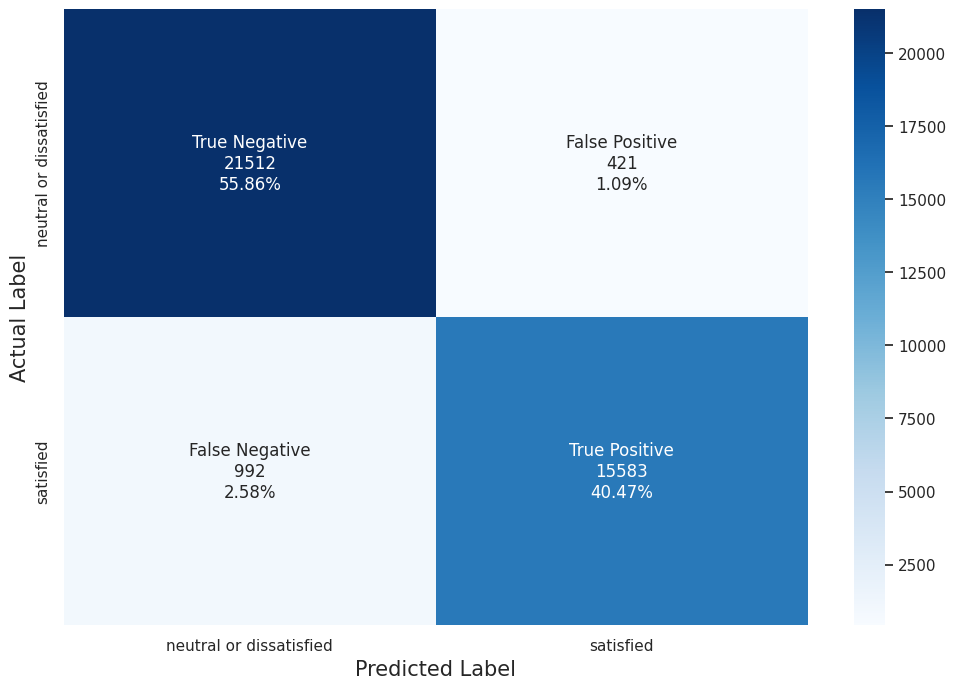

In [95]:
plt.figure(figsize=(12, 8))
cf_matrix=confusion_matrix(y_test,pred_rf)
group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',xticklabels=["neutral or dissatisfied","satisfied"], yticklabels=["neutral or dissatisfied","satisfied"])
ax.set_xlabel('Predicted Label',fontsize = 15)
ax.set_ylabel('Actual Label',fontsize = 15)
plt.show()

As we saw in the confusion matrix, the model predicted most of the data correctly. If we look at the wrong guesses,

Model guessed 395 of those who were actually 'neutral or dissatifisfied' wrong
and said 'satisfied'. Their rate is 1.03% of the total data.
Model guessed 1023 of those who were actually 'satisfied' wrong and said 'neutral or dissatisfied'. Their rate is 2.66% of the total data.

**Summary**

1. What is the condition of customer satisfaction?

 A total of 58,879 out of 103,904 passengers (56.67% of passengers) felt neutral or dissatisfied with the services provided by airlines.
Passengers who feel neutral or dissatisfied tend to be more in the age range of around 20-40 years, while passengers who feel satisfied with the services provided tend to be more in the age range of 40-60 years.

2. What factors have the greatest influence on overall passenger satisfaction and dissatisfaction?

 Of the 14 factors that influence satisfaction surveyed by airlines, there are 3 factors with the best service ratings (in order from best), namely Inflight service, Baggage Handling, and Seat comfort. Furthermore, there are 3 factors with the worst service rating (in order from worst), namely Inflight wifi service, Ease of Online booking, Gate location.

- Airlines need to pay more attention to the 3 factors with the worst service ratings so that their services can be improved to increase passenger satisfaction.

 **Recommendation:**

- Inflight wifi service: this factor can be improved by improving the quality of wifi provided by the airline.

- Ease of Online booking: this factor can be improved by creating an application with features that are more current or up-to-date. Or if there is already an online booking application, the application needs to be developed so that it is easier to understand and makes it easier for passengers to online booking and online boarding (more user friendly).

- Gate location: the gate location factor can be adjusted so that it is not too far from the plane so that it does not require more time and energy to mobilize from the gate to the plane. Adding shuttle bus facilities for remote gate and aircraft locations could also be an option.

4. What class of passengers are most dissatisfied ?

 Eco class passengers are the class with the most dissatisfaction, namely 38,044 passengers or the equivalent of 81% of eco class passengers feel dissatisfied.

 **Recommendation:**

 The aircraft class segmentation that needs to be prioritized for improvement is the eco class because eco class users are the largest users after business class and most passengers feel neutral or dissatisfied, so that the impact provided can have more opportunities to improve customer satisfaction.

5. How is the type of passenger related to the level of passenger satisfaction?

  It can be seen that Loyal Customers and Disloyal Customers both have a tendency to assess service as neutral or dissatisfied. The proportion of Disloyal Customers who choose neutral or dissatisfied is quite large, namely 76%. Meanwhile, the proportion of Loyal customers who feel neutral or dissatisfied is 52%. From the results of statistical testing, it can be understood that customer type influences passenger satisfaction.

  **Recommendation:**

  It is understood that companies also have to improve services and look for new marketing strategies so that new customers come and disloyal customers can be converted into loyal customers. Apart from that, airlines can also consider the approach of providing rewards for disloyal customers to be able to use the airline again, for example using the Miles feature.

6. How is the relationship between plane delays and passenger satisfaction levels?

  Airplane delay times upon arrival or departure tend not to have a significant relationship with the level of customer satisfaction. Meanwhile, late arrival time and late departure time have a relationship that tends to be linear.

 **Recommendation :**

 Even though there is no relationship between delay time and customer satisfaction, airlines still have to provide compensation to passengers if they exceed certain minutes.